In [1]:
# all the imports necessary
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Analysis of the prices of laptops available on Flipkart

In [2]:

url="https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off"

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0 Safari/537.36"
}

In [4]:
response=requests.get(url,headers=headers) # get the webpage

In [5]:
response.status_code # checking the status code

200

In [6]:
webpage=response.text 

In [7]:
soup = BeautifulSoup(webpage,"html.parser") # parse the html

# 1)Extract the Data

In [8]:
all_containers=soup.find_all("div",class_="tUxRFH") # from the nested div extracting the data from the first one

In [9]:
# Initialize empty lists to store extracted data
laptop_list = []
rating_list = []
price_list = []
display_list = []
review_list = []
ram_list = []
warranty_list = []
ssd_list = []

# Define headers (to mimic a real browser request)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0 Safari/537.36"
}

# Loop through multiple Flipkart pages (1 to 19)
for i in range(1, 20):
    # Generate URL for each page
    url = f"https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={i}"

    # Send GET request
    response = requests.get(url, headers=headers)
    webpage = response.text

    # Parse HTML content
    soup = BeautifulSoup(webpage, "html.parser")

    # Find all product containers
    all_containers = soup.find_all("div", class_="tUxRFH")

    # Extract details for each product
    for container in all_containers:

        # Price of laptop
        prices = container.find("div", class_="Nx9bqj _4b5DiR")

        # Laptop name/title
        labtops = container.find("div", class_="KzDlHZ")

        # Star ratings
        star = container.find("div", class_="XQDdHH")

        # Extract SSD info (e.g., "512 GB SSD" or "1 TB SSD")
        ssd = re.findall(r"(\d+)\s*(GB|TB)\s*SSD", container.text)

        # Extract display size (in inches or cm)
        display = re.findall(r"\((\d+\.?\d+)\s*(inch|cm)\)", container.text)

        # Extract review count (e.g., "1,040 Reviews")
        reviews = re.findall(r"([\d,]+)\s+Reviews", container.text)

        # Extract warranty info (e.g., "1 Year", "6 Months")
        warranty = re.findall(r"(\d+)\s+(Year|Years|Month|Months)", container.text)

        # Extract RAM info (e.g., "8 GB DDR4 RAM")
        ram = re.findall(r"(\d+)\s*GB\s*(\w+)?\s*RAM", container.text)

        # ---------------- Append Data Safely ---------------- #

        # Price
        if prices:
            price_list.append(prices.text)
        else:
            price_list.append(np.nan)

        # Laptop Name
        if labtops:
            laptop_list.append(labtops.text)
        else:
            laptop_list.append(np.nan)

        # Ratings
        if star:
            rating_list.append(star.text)
        else:
            rating_list.append(np.nan)

        # Reviews (convert "1,040" → 1040)
        if reviews:
            review_count = reviews[0].replace(",", "")
            review_list.append(int(review_count))
        else:
            review_list.append(np.nan)

        # Warranty (convert everything to months)
        if warranty:
            number, unit = warranty[0]
            number = int(number)
            if "Year" in unit:   # Convert years → months
                months = number * 12
            else:
                months = number
            warranty_list.append(months)
        else:
            warranty_list.append(np.nan)

        # Display size (convert cm → inches if needed)
        if display:
            size, unit = display[0]
            size = float(size)
            if unit == "cm":
                size = size / 2.54   # 1 inch = 2.54 cm
            display_list.append(size)
        else:
            display_list.append(np.nan)

        # RAM size (only numeric GB value)
        if ram:
            size, ram_type = ram[0]
            ram_list.append(int(size))
        else:
            ram_list.append(np.nan)

        # SSD size (convert TB → GB, store in GB)
        if ssd:
            size, unit = ssd[0]
            size = int(size)
            if unit == "TB":
                size = size * 1024  # Convert TB to GB
            ssd_list.append(size)
        else:
            ssd_list.append(np.nan)


# 2)Create a Data Frame 


In [10]:
df = pd.DataFrame({
    "Laptop": laptop_list,
    "Ratings": rating_list,
    "Ram": ram_list,
    "Screen_size": display_list,
    "ssd": ssd_list,
    "Warranty": warranty_list,
    "Reviews": review_list,
    "Price": price_list
})


In [11]:
df.head()

,Laptop,Ratings,Ram,Screen_size,ssd,Warranty,Reviews,Price
0,Acer Swift Neo Intel Core Ultra 5 115U - (16 G...,NaN,16.0,14.0,1024.0,12.0,NaN,"₹52,989"
1,Lenovo LOQ 2025 AMD Ryzen 7 Octa Core 250 - (2...,NaN,24.0,15.6,1024.0,12.0,NaN,"₹1,22,490"
2,Samsung Galaxy Book4 Metal Intel Core i7 13th ...,4.4,16.0,NaN,512.0,12.0,242.0,"₹57,989"
3,Samsung Galaxy Book4 Metal Intel Core i3 13th ...,4.4,8.0,NaN,512.0,12.0,594.0,"₹31,990"
4,Samsung Galaxy Book4 Metal Intel Core i5 13th ...,4.4,8.0,NaN,512.0,12.0,944.0,"₹48,489"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Laptop       456 non-null    object 
 1   Ratings      428 non-null    object 
 2   Ram          437 non-null    float64
 3   Screen_size  218 non-null    float64
 4   ssd          450 non-null    float64
 5   Warranty     433 non-null    float64
 6   Reviews      428 non-null    float64
 7   Price        456 non-null    object 
dtypes: float64(5), object(3)
memory usage: 28.6+ KB


In [13]:
# Convert the 'Ratings' column from object (string) type to float (numeric) type
df['Ratings'] = df['Ratings'].astype('float')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Laptop       456 non-null    object 
 1   Ratings      428 non-null    float64
 2   Ram          437 non-null    float64
 3   Screen_size  218 non-null    float64
 4   ssd          450 non-null    float64
 5   Warranty     433 non-null    float64
 6   Reviews      428 non-null    float64
 7   Price        456 non-null    object 
dtypes: float64(6), object(2)
memory usage: 28.6+ KB


# 3)Export into .csv format 

In [15]:
# Export DataFrame into CSV format
df.to_csv("laptops_data.csv", index=False)

print("Data exported successfully to laptops_data.csv")


Data exported successfully to laptops_data.csv


# 4)Read CSV File 

In [16]:
df = pd.read_csv("laptops_data.csv")

# 1. How many features (columns)?
print("Number of features (columns):", df.shape[1])

# 2. How many observations (rows)?
print("Number of observations (rows):", df.shape[0])



Number of features (columns): 8
Number of observations (rows): 456


In [17]:
# 3. Data type of each feature
print("\nData Types of Each Column:\n", df.dtypes)

# 4. Missing values in each feature
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Data Types of Each Column:
 Laptop          object
Ratings        float64
Ram            float64
Screen_size    float64
ssd            float64
Warranty       float64
Reviews        float64
Price           object
dtype: object

Missing Values in Each Column:
 Laptop           0
Ratings         28
Ram             19
Screen_size    238
ssd              6
Warranty        23
Reviews         28
Price            0
dtype: int64


# 5)Clean the Data 

In [18]:
# Clean and convert the 'Price' column:
# 1. Remove the '₹' currency symbol
# 2. Remove commas (e.g., "1,04,999" → "104999")
# 3. Convert the cleaned string values into float type for numeric operations
df["Price"] = df["Price"].str.replace("₹", "").str.replace(",", "").astype(float)

In [19]:
# Extract the company/brand name from the 'Laptop' column:
# 1. Split the laptop name by spaces → take the first word (brand name)
# 2. Convert it to uppercase for consistency (e.g., "Dell", "DELL" → "DELL")
df["Company"] = df["Laptop"].str.split().str[0].str.upper()


In [20]:
# Extract the processor generation (e.g., "11th Gen", "13th Gen", "14th Gen")
df["Generation"] = df["Laptop"].str.extract(r'(\d{1,2}(?:st|nd|rd|th)\s*Gen)', expand=False)
# Keep only the number + suffix (e.g., 13th, 11th) and remove 'Gen'
df["Generation"] = df["Generation"].str.replace(r'\s*Gen', '', regex=True)


In [21]:
# Extract processor (Intel Core iX or AMD Ryzen X)
df["Processor"] = df["Laptop"].str.extract(r'(Intel\s+Core\s+i\d|AMD\s+Ryzen\s+\d+)', expand=False)

# Remove the "Intel Core" prefix, keep only i3, i5, i7, i9
df["Processor"] = df["Processor"].str.replace(r'Intel\s+Core\s+', '', regex=True)

In [22]:
# Drop the Laptop column
df = df.drop(columns=["Laptop"])

In [23]:
# Reorder columns: Company comes first, others follow
cols = ["Company"] + [col for col in df.columns if col != "Company"]
df = df[cols]


In [24]:
df.head()

,Company,Ratings,Ram,Screen_size,ssd,Warranty,Reviews,Price,Generation,Processor
0,ACER,NaN,16.0,14.0,1024.0,12.0,NaN,52989.0,NaN,NaN
1,LENOVO,NaN,24.0,15.6,1024.0,12.0,NaN,122490.0,NaN,AMD Ryzen 7
2,SAMSUNG,4.4,16.0,NaN,512.0,12.0,242.0,57989.0,13th,i7
3,SAMSUNG,4.4,8.0,NaN,512.0,12.0,594.0,31990.0,13th,i3
4,SAMSUNG,4.4,8.0,NaN,512.0,12.0,944.0,48489.0,13th,i5


In [25]:
df.isnull().sum()

Company          0
Ratings         28
Ram             19
Screen_size    238
ssd              6
Warranty        23
Reviews         28
Price            0
Generation     183
Processor      150
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      456 non-null    object 
 1   Ratings      428 non-null    float64
 2   Ram          437 non-null    float64
 3   Screen_size  218 non-null    float64
 4   ssd          450 non-null    float64
 5   Warranty     433 non-null    float64
 6   Reviews      428 non-null    float64
 7   Price        456 non-null    float64
 8   Generation   273 non-null    object 
 9   Processor    306 non-null    object 
dtypes: float64(7), object(3)
memory usage: 35.8+ KB


In [27]:
# Fill missing 'Ratings' values with the column mean
df["Ratings"].fillna(df["Ratings"].mean(), inplace=True)

In [28]:
# Fill missing 'Ram' values with the column median
df["Ram"].fillna(df["Ram"].median(), inplace=True)

In [29]:
# Fill missing 'Screen_size' values with the column mean
df["Screen_size"].fillna(df["Screen_size"].mean(), inplace=True)

In [30]:
# Fill missing 'ssd' values with the column mean
df["ssd"].fillna(df["ssd"].mean(), inplace=True)


In [31]:
# # Fill missing 'Warranty' values with the column mean
df["Warranty"].fillna(df["Warranty"].mean(), inplace=True)


In [32]:
# Fill missing 'Reviews' values with the median of the column
df["Reviews"].fillna(df["Reviews"].median(), inplace=True)

In [33]:
# Fill missing Processor values with the most frequent value (mode) in the column
df["Processor"].fillna(df["Processor"].mode()[0], inplace=True)

In [34]:
# Fill missing 'Generation' values with the most frequent value (mode) of the column
df["Generation"].fillna(df["Generation"].mode()[0], inplace=True)

In [35]:
df.isnull().sum()

Company        0
Ratings        0
Ram            0
Screen_size    0
ssd            0
Warranty       0
Reviews        0
Price          0
Generation     0
Processor      0
dtype: int64

In [36]:
# Function to cap outliers using the IQR method
def cap_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Compute Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values at the bounds instead of removing rows
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Identify all numeric columns (float and integer types)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Apply outlier capping to all numeric columns
for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

# Print confirmation with the total number of rows (unchanged)
print("Outliers handled by capping. Row count:", df.shape)


Outliers handled by capping. Row count: (456, 10)


# 6)EDA (Exploratory Data Analysis)

 ## `Uni-variate Analysis`

## Categorical Variables

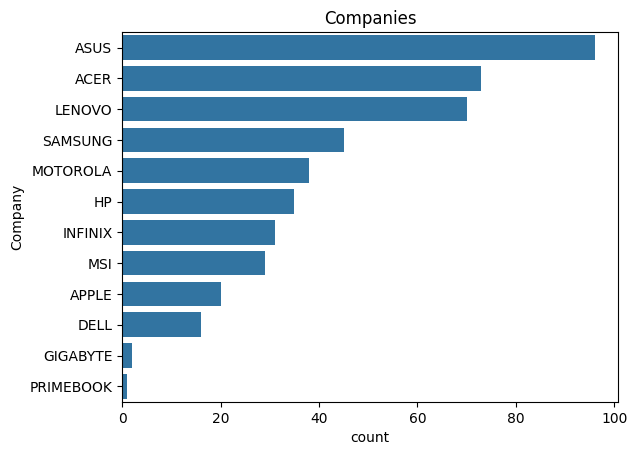

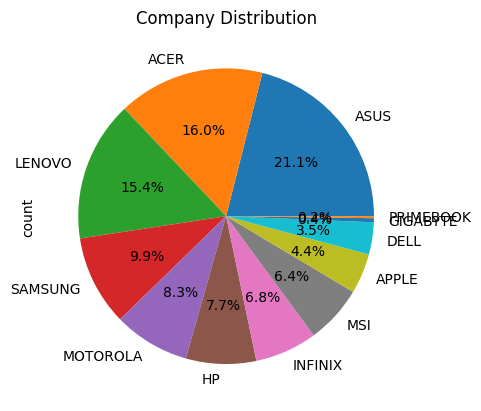

Company
ASUS         96
ACER         73
LENOVO       70
SAMSUNG      45
MOTOROLA     38
HP           35
INFINIX      31
MSI          29
APPLE        20
DELL         16
GIGABYTE      2
PRIMEBOOK     1
Name: count, dtype: int64


In [37]:
# Horizontal count plot showing frequency of each company
sns.countplot(y="Company", data=df, order=df["Company"].value_counts().index)
plt.title("Companies")
plt.show()

# Pie chart showing percentage distribution of companies
df["Company"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Company Distribution")
plt.show()

# Print the count of laptops for each company
print(df['Company'].value_counts())

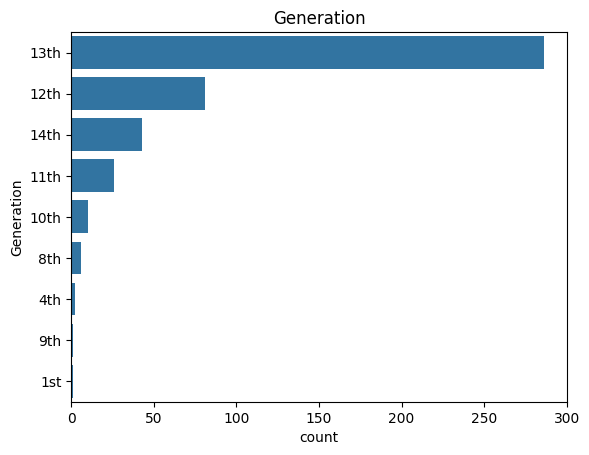

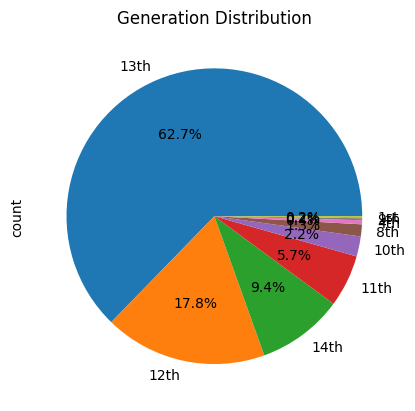

Generation
13th    286
12th     81
14th     43
11th     26
10th     10
8th       6
4th       2
9th       1
1st       1
Name: count, dtype: int64


In [38]:
# Horizontal count plot showing frequency of each generation
sns.countplot(y="Generation", data=df, order=df["Generation"].value_counts().index)
plt.title("Generation")
plt.show()

# Pie chart showing percentage distribution of each generation
df["Generation"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Generation Distribution")
plt.show()

# Print the count of laptops for each generation
print(df['Generation'].value_counts())

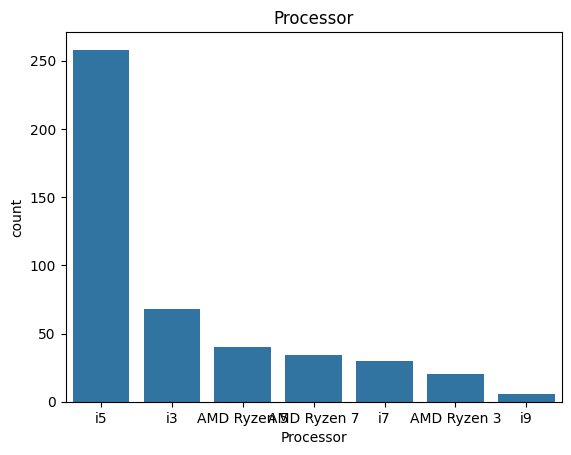

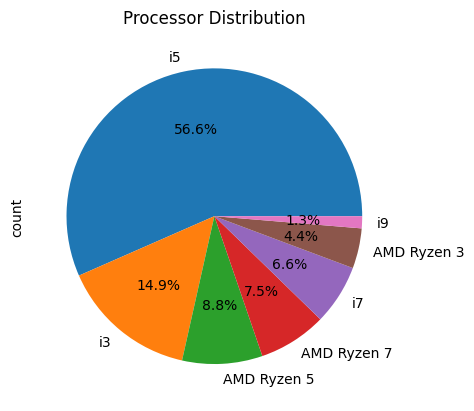

Processor
i5             258
i3              68
AMD Ryzen 5     40
AMD Ryzen 7     34
i7              30
AMD Ryzen 3     20
i9               6
Name: count, dtype: int64


In [39]:
# Vertical count plot showing frequency of each processor type
sns.countplot(x="Processor", data=df, order=df["Processor"].value_counts().index)
plt.title("Processor")
plt.show()

# Pie chart showing percentage distribution of each processor type
df["Processor"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Processor Distribution")
plt.show()

# Print the count of laptops for each processor type
print(df['Processor'].value_counts())

## Continuous Variables

count    456.000000
mean       4.276636
std        0.185794
min        3.900000
25%        4.200000
50%        4.300000
75%        4.400000
max        4.700000
Name: Ratings, dtype: float64


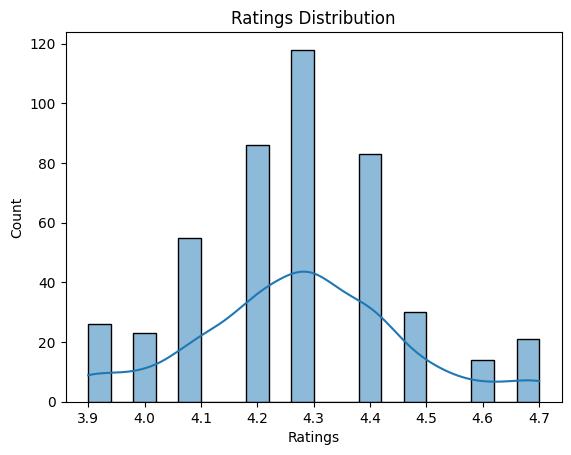

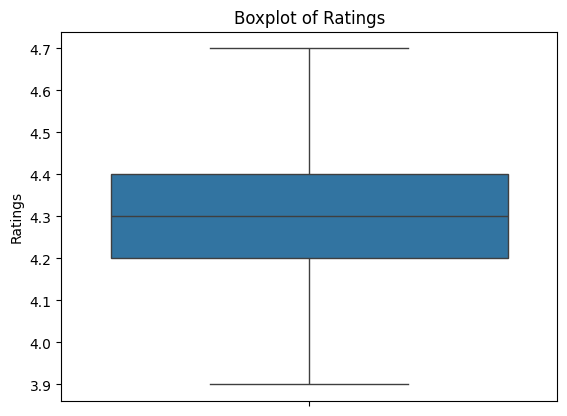

In [40]:
# Print summary statistics (count, mean, std, min, max, quartiles) for Ratings
print(df["Ratings"].describe())

# Histogram with KDE to visualize the distribution of Ratings
sns.histplot(df["Ratings"], kde=True, bins=20)
plt.title("Ratings Distribution")
plt.show()

# Boxplot to visualize spread and detect outliers in Ratings
sns.boxplot(y=df["Ratings"])
plt.title("Boxplot of Ratings")
plt.show()

count    456.000000
mean      13.692982
std        5.174115
min        4.000000
25%        8.000000
50%       16.000000
75%       16.000000
max       28.000000
Name: Ram, dtype: float64


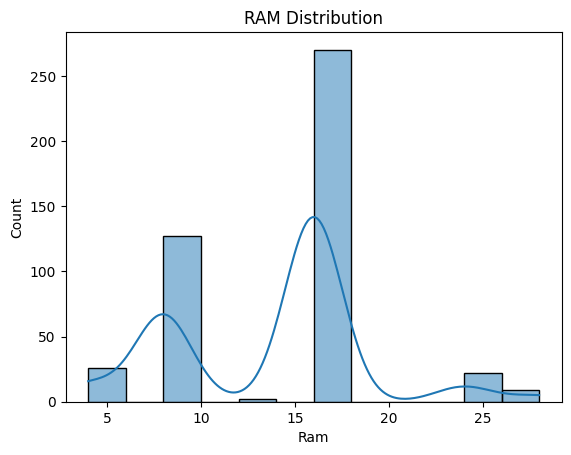

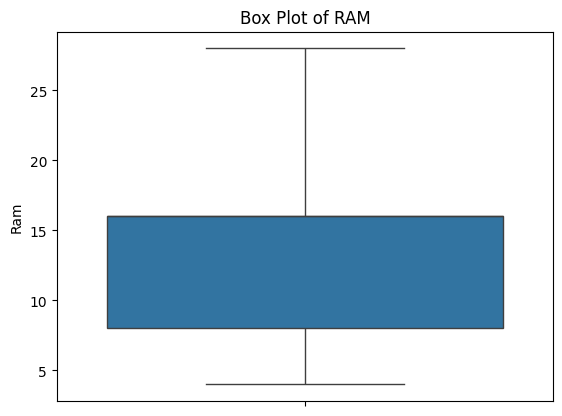

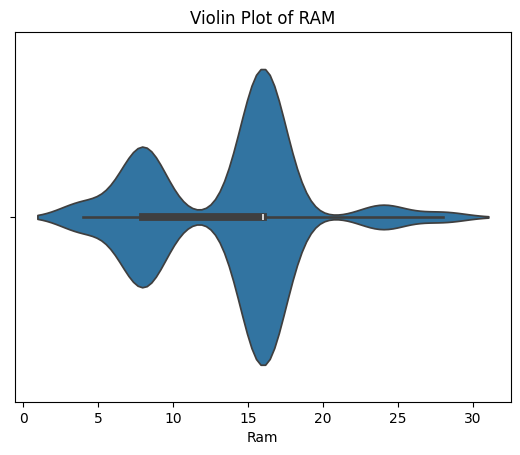

In [41]:
# Print summary statistics (count, mean, std, min, max, quartiles) for RAM
print(df["Ram"].describe())

# Histogram with KDE to visualize the distribution of RAM
sns.histplot(df["Ram"], kde=True)
plt.title("RAM Distribution")
plt.show()

# Boxplot to show spread and detect outliers in RAM
sns.boxplot(y=df["Ram"])
plt.title("Box Plot of RAM")
plt.show()

# Violin plot to show distribution and density of RAM values
sns.violinplot(x=df["Ram"])
plt.title("Violin Plot of RAM")
plt.show()

count    456.000000
mean      15.164441
std        0.439432
min       14.371560
25%       15.108624
50%       15.108624
75%       15.600000
max       16.337064
Name: Screen_size, dtype: float64


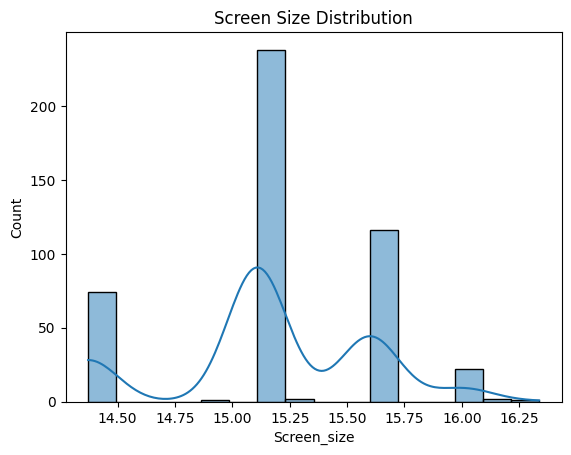

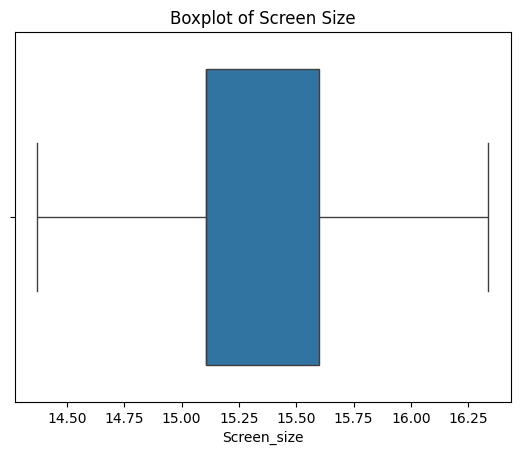

In [42]:
# Print summary statistics (count, mean, std, min, max, quartiles) for Screen Size
print(df["Screen_size"].describe())

# Histogram with KDE to visualize the distribution of Screen Size
sns.histplot(df["Screen_size"], kde=True)
plt.title("Screen Size Distribution")
plt.show()

# Boxplot to show spread and detect outliers in Screen Size
sns.boxplot(x=df["Screen_size"])
plt.title("Boxplot of Screen Size")
plt.show()

count    456.000000
mean     106.402412
std      109.614579
min        0.000000
25%       16.000000
50%       69.000000
75%      145.000000
max      338.500000
Name: Reviews, dtype: float64


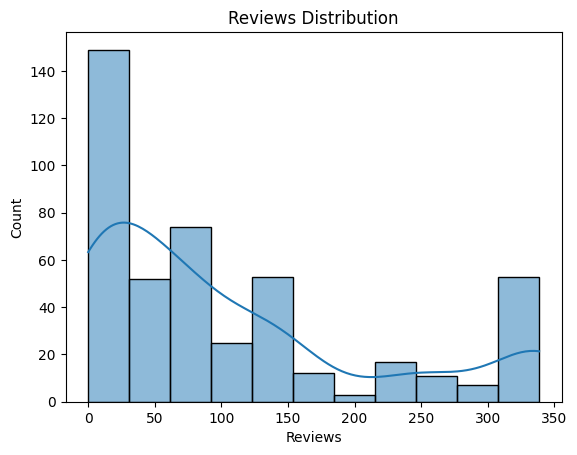

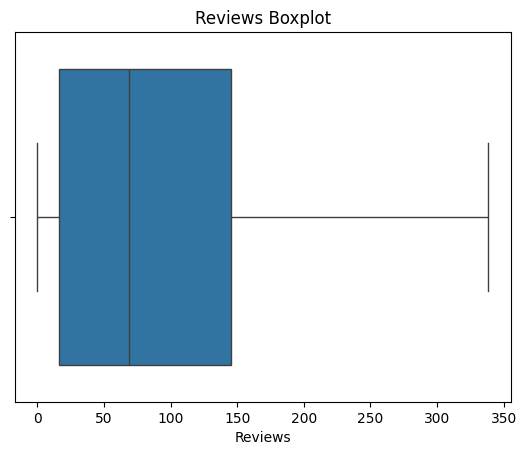

In [43]:
# Print summary statistics (count, mean, std, min, max, quartiles) for Reviews
print(df["Reviews"].describe())

# Histogram with KDE to visualize the distribution of Reviews
sns.histplot(df["Reviews"], kde=True)
plt.title("Reviews Distribution")
plt.show()

# Boxplot to show spread and detect outliers in Reviews
sns.boxplot(x=df["Reviews"])
plt.title("Reviews Boxplot")
plt.show()



count      456.000000
mean     52512.066886
std      22608.580674
min      14990.000000
25%      35864.250000
50%      49989.000000
75%      61306.250000
max      99469.250000
Name: Price, dtype: float64


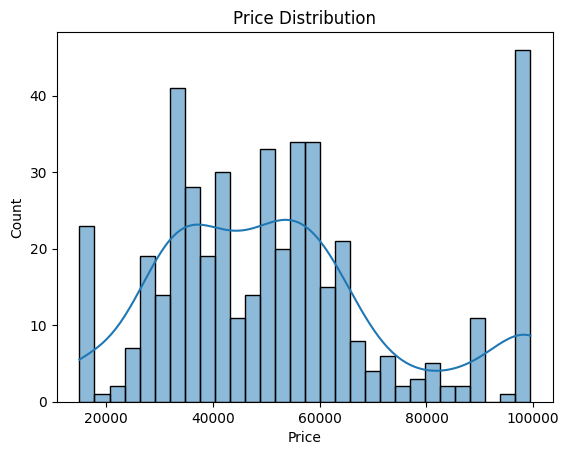

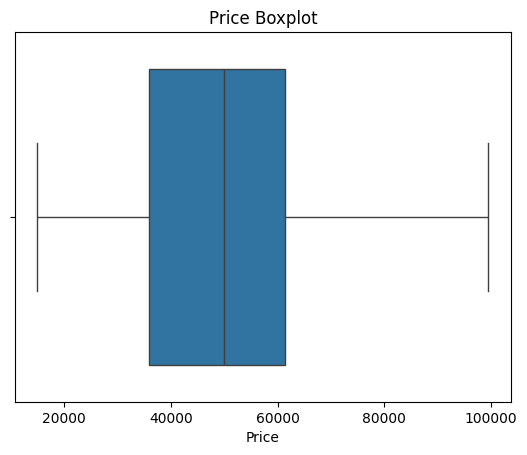

In [44]:
# Print summary statistics (count, mean, std, min, max, quartiles) for Price
print(df["Price"].describe())

# Histogram with KDE to visualize the distribution of Price
sns.histplot(df["Price"], kde=True, bins=30)
plt.title("Price Distribution")
plt.show()

# Boxplot to show spread and detect outliers in Price
sns.boxplot(x=df["Price"])
plt.title("Price Boxplot")
plt.show()


count    456.0
mean     512.0
std        0.0
min      512.0
25%      512.0
50%      512.0
75%      512.0
max      512.0
Name: ssd, dtype: float64


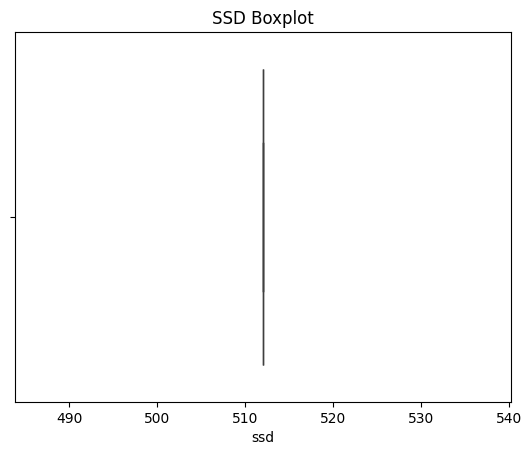

In [45]:
# Print summary statistics (count, mean, std, min, max, quartiles) for SSD
print(df["ssd"].describe())

# Boxplot to show spread and detect outliers in SSD
sns.boxplot(x=df["ssd"])
plt.title("SSD Boxplot")
plt.show()


count    456.000000
mean      19.197368
std       12.334374
min       12.000000
25%       12.000000
50%       12.000000
75%       24.000000
max       42.000000
Name: Warranty, dtype: float64


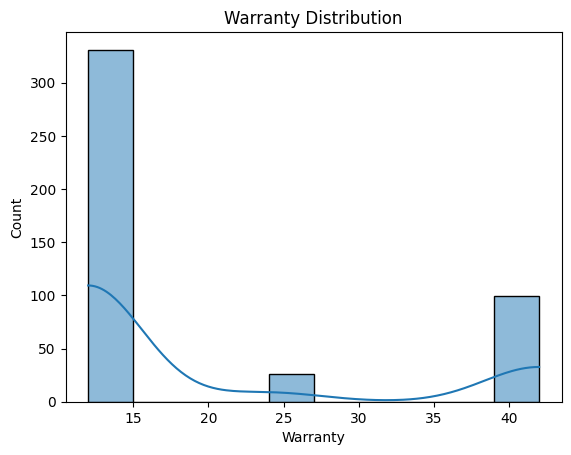

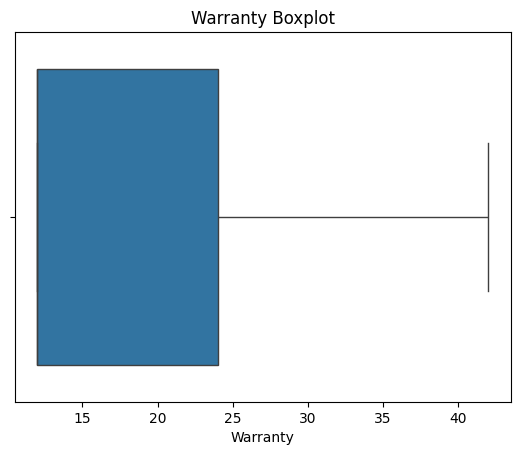

In [246]:
# Print summary statistics of the 'Reviews' column
print(df["Warranty"].describe())

# Plot a histogram with KDE for 'Reviews' to visualize distribution
sns.histplot(df["Warranty"], kde=True)
plt.title("Warranty Distribution")
plt.show()

# Plot a boxplot for 'Reviews' to visualize spread and outliers
sns.boxplot(x=df["Warranty"])
plt.title("Warranty Boxplot")
plt.show()


## `Bi-variate Analysis`

## 1. Continuous ↔ Categorical

In [46]:
# Calculate and print average Price for each Company
avg_price_company = df.groupby("Company")["Price"].mean()
print("Average Price by Company:\n", avg_price_company.reset_index(), "\n")

# Calculate and print average Price and Ratings for each Generation category
avg_price_ratings_warranty = df.groupby("Generation")[["Price", "Ratings"]].mean()
print("Average Price & Ratings by Generation:\n", avg_price_ratings_warranty, "\n")

# Create and print a pivot table of average Price grouped by Company and Generation
pivot_price = df.pivot_table(values="Price", index="Company", columns="Generation", aggfunc="mean")
print("Pivot Table - Average Price (Company vs Generation):\n", pivot_price, "\n")


Average Price by Company:
       Company         Price
0        ACER  43224.636986
1       APPLE  89425.075000
2        ASUS  46846.919271
3        DELL  50780.437500
4    GIGABYTE  75990.000000
5          HP  50686.571429
6     INFINIX  25019.354839
7      LENOVO  69035.400000
8    MOTOROLA  55778.473684
9         MSI  53168.525862
10  PRIMEBOOK  27990.000000
11    SAMSUNG  54850.311111 

Average Price & Ratings by Generation:
                    Price   Ratings
Generation                        
10th        56066.300000  4.290000
11th        24708.846154  3.988462
12th        46350.447531  4.229630
13th        56002.547203  4.305755
14th        57499.732558  4.344186
1st         99469.250000  4.200000
4th         27979.000000  4.100000
8th         45156.666667  4.300000
9th         72439.000000  4.500000 

Pivot Table - Average Price (Company vs Generation):
 Generation          10th     11th          12th          13th          14th  \
Company                                        

## 2. Continuous ↔ Continuous

In [47]:
# Compute and print the correlation matrix for all numeric columns
corr = df.corr(numeric_only=True)
print("Correlation Matrix (Continuous Variables):\n", corr, "\n")


Correlation Matrix (Continuous Variables):
               Ratings       Ram  Screen_size  ssd  Warranty   Reviews  \
Ratings      1.000000  0.292766    -0.092762  NaN       NaN -0.140524   
Ram          0.292766  1.000000     0.178708  NaN       NaN -0.436914   
Screen_size -0.092762  0.178708     1.000000  NaN       NaN -0.174765   
ssd               NaN       NaN          NaN  NaN       NaN       NaN   
Warranty          NaN       NaN          NaN  NaN       NaN       NaN   
Reviews     -0.140524 -0.436914    -0.174765  NaN       NaN  1.000000   
Price        0.576573  0.660970     0.145161  NaN       NaN -0.434755   

                Price  
Ratings      0.576573  
Ram          0.660970  
Screen_size  0.145161  
ssd               NaN  
Warranty          NaN  
Reviews     -0.434755  
Price        1.000000   



## 3. Categorical ↔ Categorical


In [48]:
# Create and print a crosstab showing the count of laptops for each Company vs Generation
ct = pd.crosstab(df["Company"], df["Generation"])
print("Crosstab - Company vs Generation:\n", ct, "\n")

# Create and print a crosstab showing the count of laptops for each Company vs Processor
ct = pd.crosstab(df["Company"], df["Processor"])
print("Crosstab - Company vs Processor:\n", ct, "\n")


Crosstab - Company vs Generation:
 Generation  10th  11th  12th  13th  14th  1st  4th  8th  9th
Company                                                     
ACER           0     0    27    42     2    0    0    1    1
APPLE          0     0     0    20     0    0    0    0    0
ASUS           2     0    10    80     1    0    0    3    0
DELL           2     2     5     7     0    0    0    0    0
GIGABYTE       0     0     0     2     0    0    0    0    0
HP             0     2     8    23     2    0    0    0    0
INFINIX        2    20     3     6     0    0    0    0    0
LENOVO         1     2    11    52     0    0    2    2    0
MOTOROLA       0     0     0     0    38    0    0    0    0
MSI            3     0    14    11     0    1    0    0    0
PRIMEBOOK      0     0     0     1     0    0    0    0    0
SAMSUNG        0     0     3    42     0    0    0    0    0 

Crosstab - Company vs Processor:
 Processor  AMD Ryzen 3  AMD Ryzen 5  AMD Ryzen 7  i3  i5  i7  i9
Company   

## `Visualization`

## 1. Continuous vs Continuous

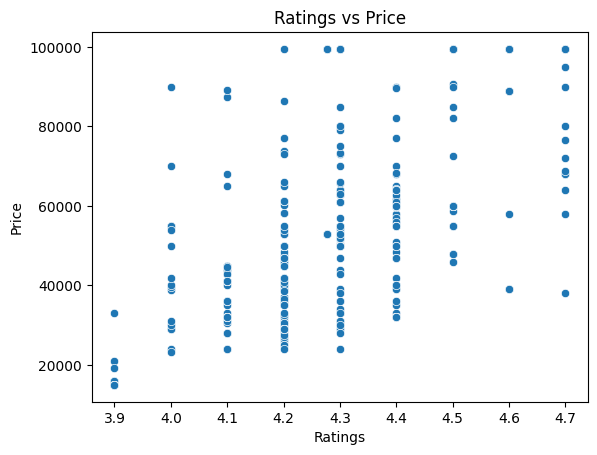

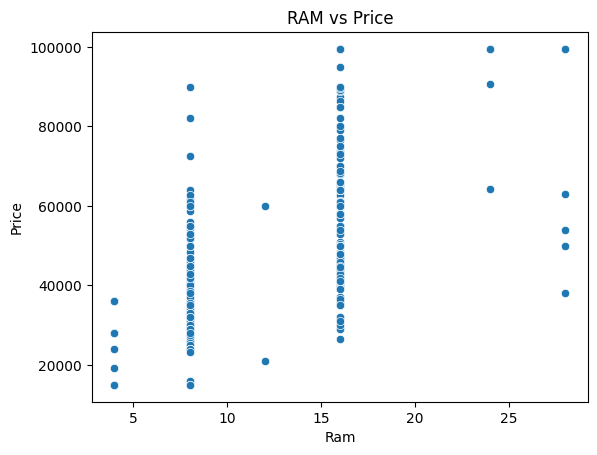

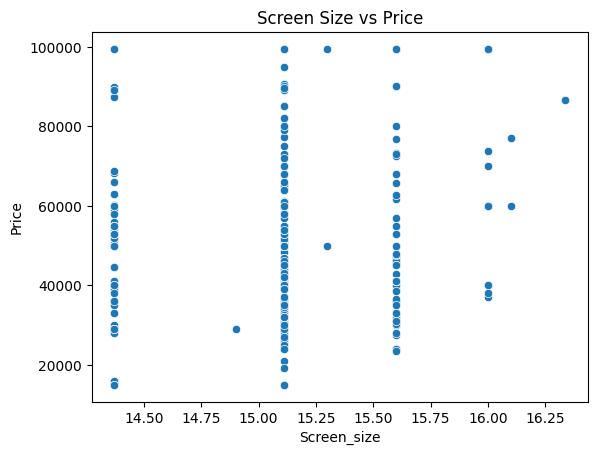

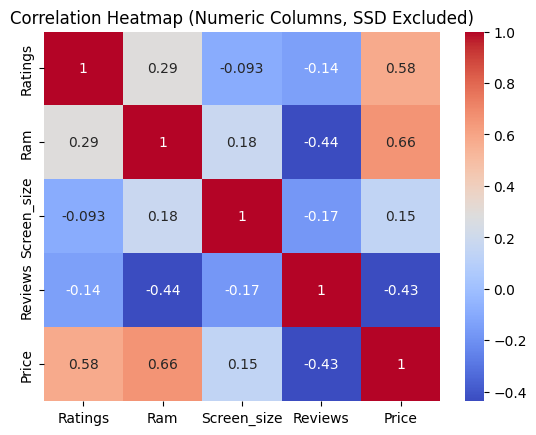

In [53]:
# Scatter plot to visualize relationship between Ratings and Price
sns.scatterplot(x="Ratings", y="Price", data=df)
plt.title("Ratings vs Price")
plt.show()

# Scatter plot to visualize relationship between RAM and Price
sns.scatterplot(x="Ram", y="Price", data=df)
plt.title("RAM vs Price")
plt.show()

# Scatter plot to visualize relationship between Screen Size and Price
sns.scatterplot(x="Screen_size", y="Price", data=df)
plt.title("Screen Size vs Price")
plt.show()

# Select all numeric columns except 'ssd' and 'Warranty'
numeric_cols = df.select_dtypes(include="number").drop(columns=["ssd",'Warranty'])

# Plot heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns, SSD Excluded)")
plt.show()

## 2. Categorical vs Continuous

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      456 non-null    object 
 1   Ratings      456 non-null    float64
 2   Ram          456 non-null    float64
 3   Screen_size  456 non-null    float64
 4   ssd          456 non-null    float64
 5   Warranty     456 non-null    float64
 6   Reviews      456 non-null    float64
 7   Price        456 non-null    float64
 8   Generation   456 non-null    object 
 9   Processor    456 non-null    object 
dtypes: float64(7), object(3)
memory usage: 35.8+ KB


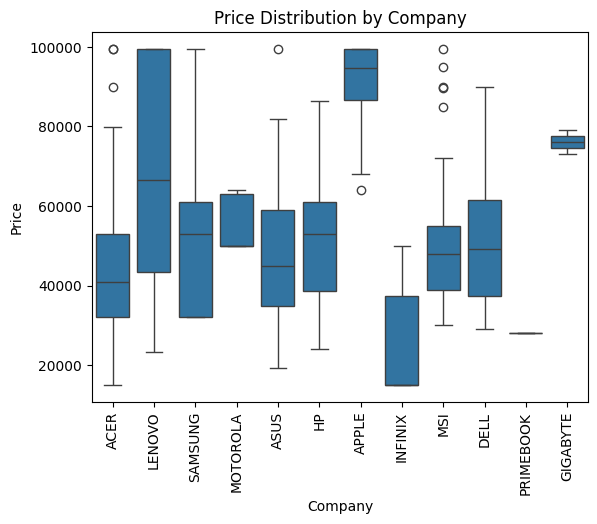

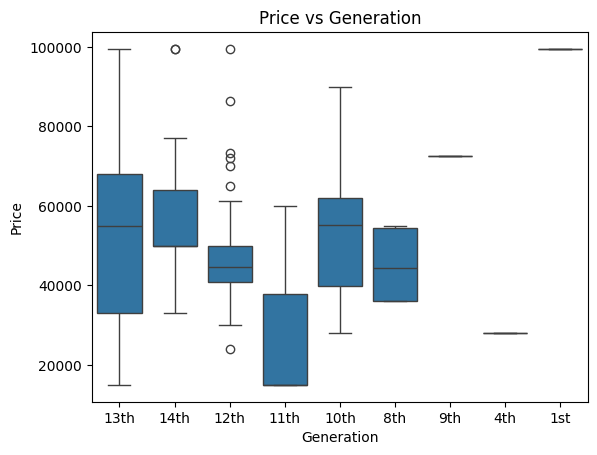

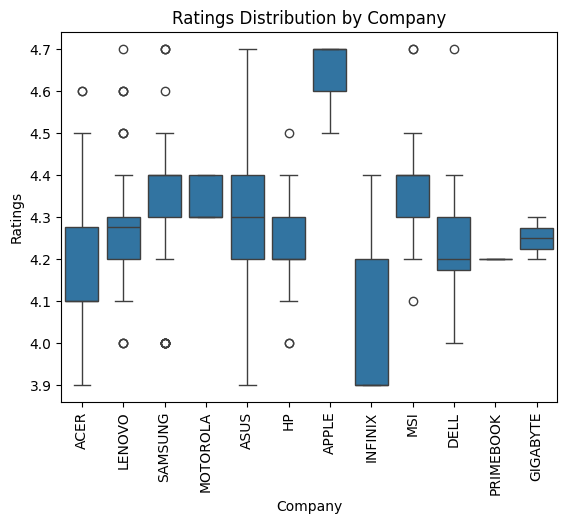

In [54]:
# Boxplot to show Price distribution for each Company
sns.boxplot(x="Company", y="Price", data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Price Distribution by Company")
plt.show()

# Boxplot to show Price distribution across Generation categories
sns.boxplot(x="Generation", y="Price", data=df)
plt.title("Price vs Generation")
plt.show()

# Boxplot to show Ratings distribution for each Company
sns.boxplot(x="Company", y="Ratings", data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Ratings Distribution by Company")
plt.show()


## 3. Categorical vs Categorical

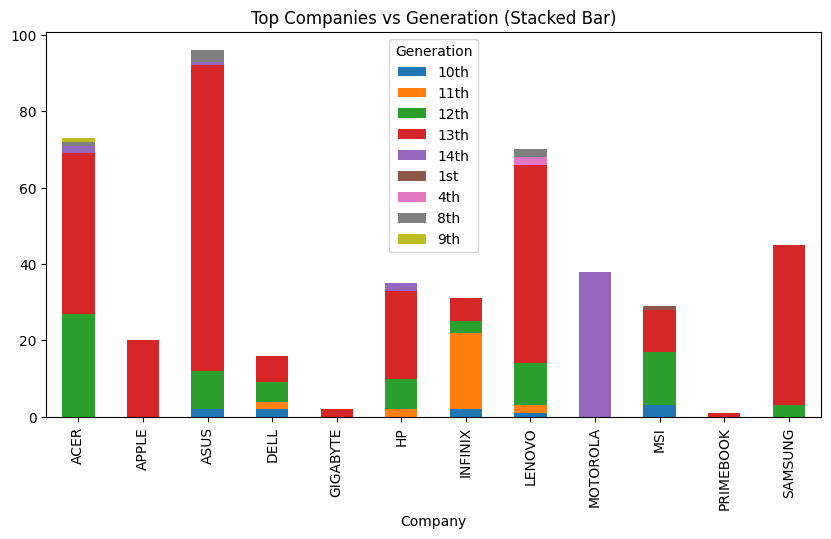

In [55]:
# Select top companies by count
top_laptops = df["Company"].value_counts().index

# Create a crosstab of top companies vs Generation
ct2 = pd.crosstab(df[df["Company"].isin(top_laptops)]["Company"], df["Generation"])

# Plot the crosstab as a stacked bar chart
ct2.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Top Companies vs Generation (Stacked Bar)")
plt.show()


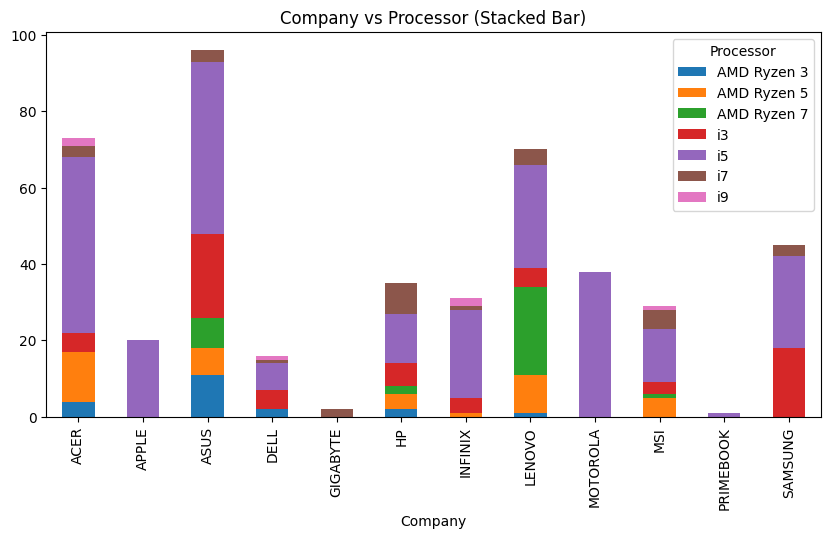

In [56]:
# Create a crosstab of Company vs Processor counts
ct = pd.crosstab(df["Company"], df["Processor"])

# Plot the crosstab as a stacked bar chart to show Processor distribution per Company
ct.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Company vs Processor (Stacked Bar)")
plt.show()

# Multivariate analysis involves examining relationships among 3 or more variables


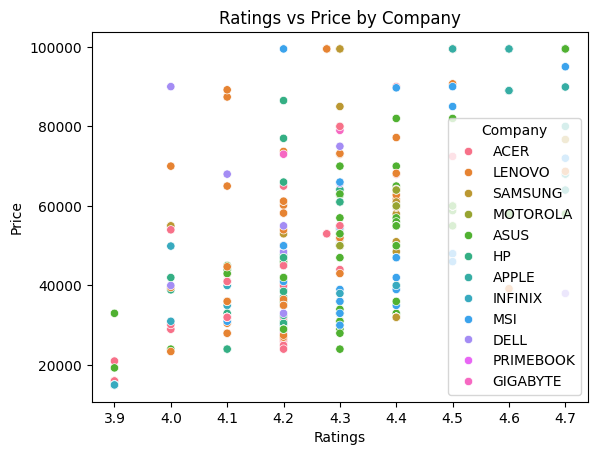

Warranty    Company          12.0
0              ACER  43224.636986
1             APPLE  89425.075000
2              ASUS  46846.919271
3              DELL  50780.437500
4          GIGABYTE  75990.000000
5                HP  50686.571429
6           INFINIX  25019.354839
7            LENOVO  69035.400000
8          MOTOROLA  55778.473684
9               MSI  53168.525862
10        PRIMEBOOK  27990.000000
11          SAMSUNG  54850.311111


In [57]:
# Scatter plot showing Ratings vs Price, colored by Company
sns.scatterplot(x="Ratings", y="Price", hue="Company", data=df)
plt.title("Ratings vs Price by Company")
plt.show()

# Pivot table showing average Price grouped by Company and Warranty
pivot_table = df.pivot_table(values="Price", index="Company", columns="Warranty", aggfunc="mean").reset_index()
print(pivot_table)


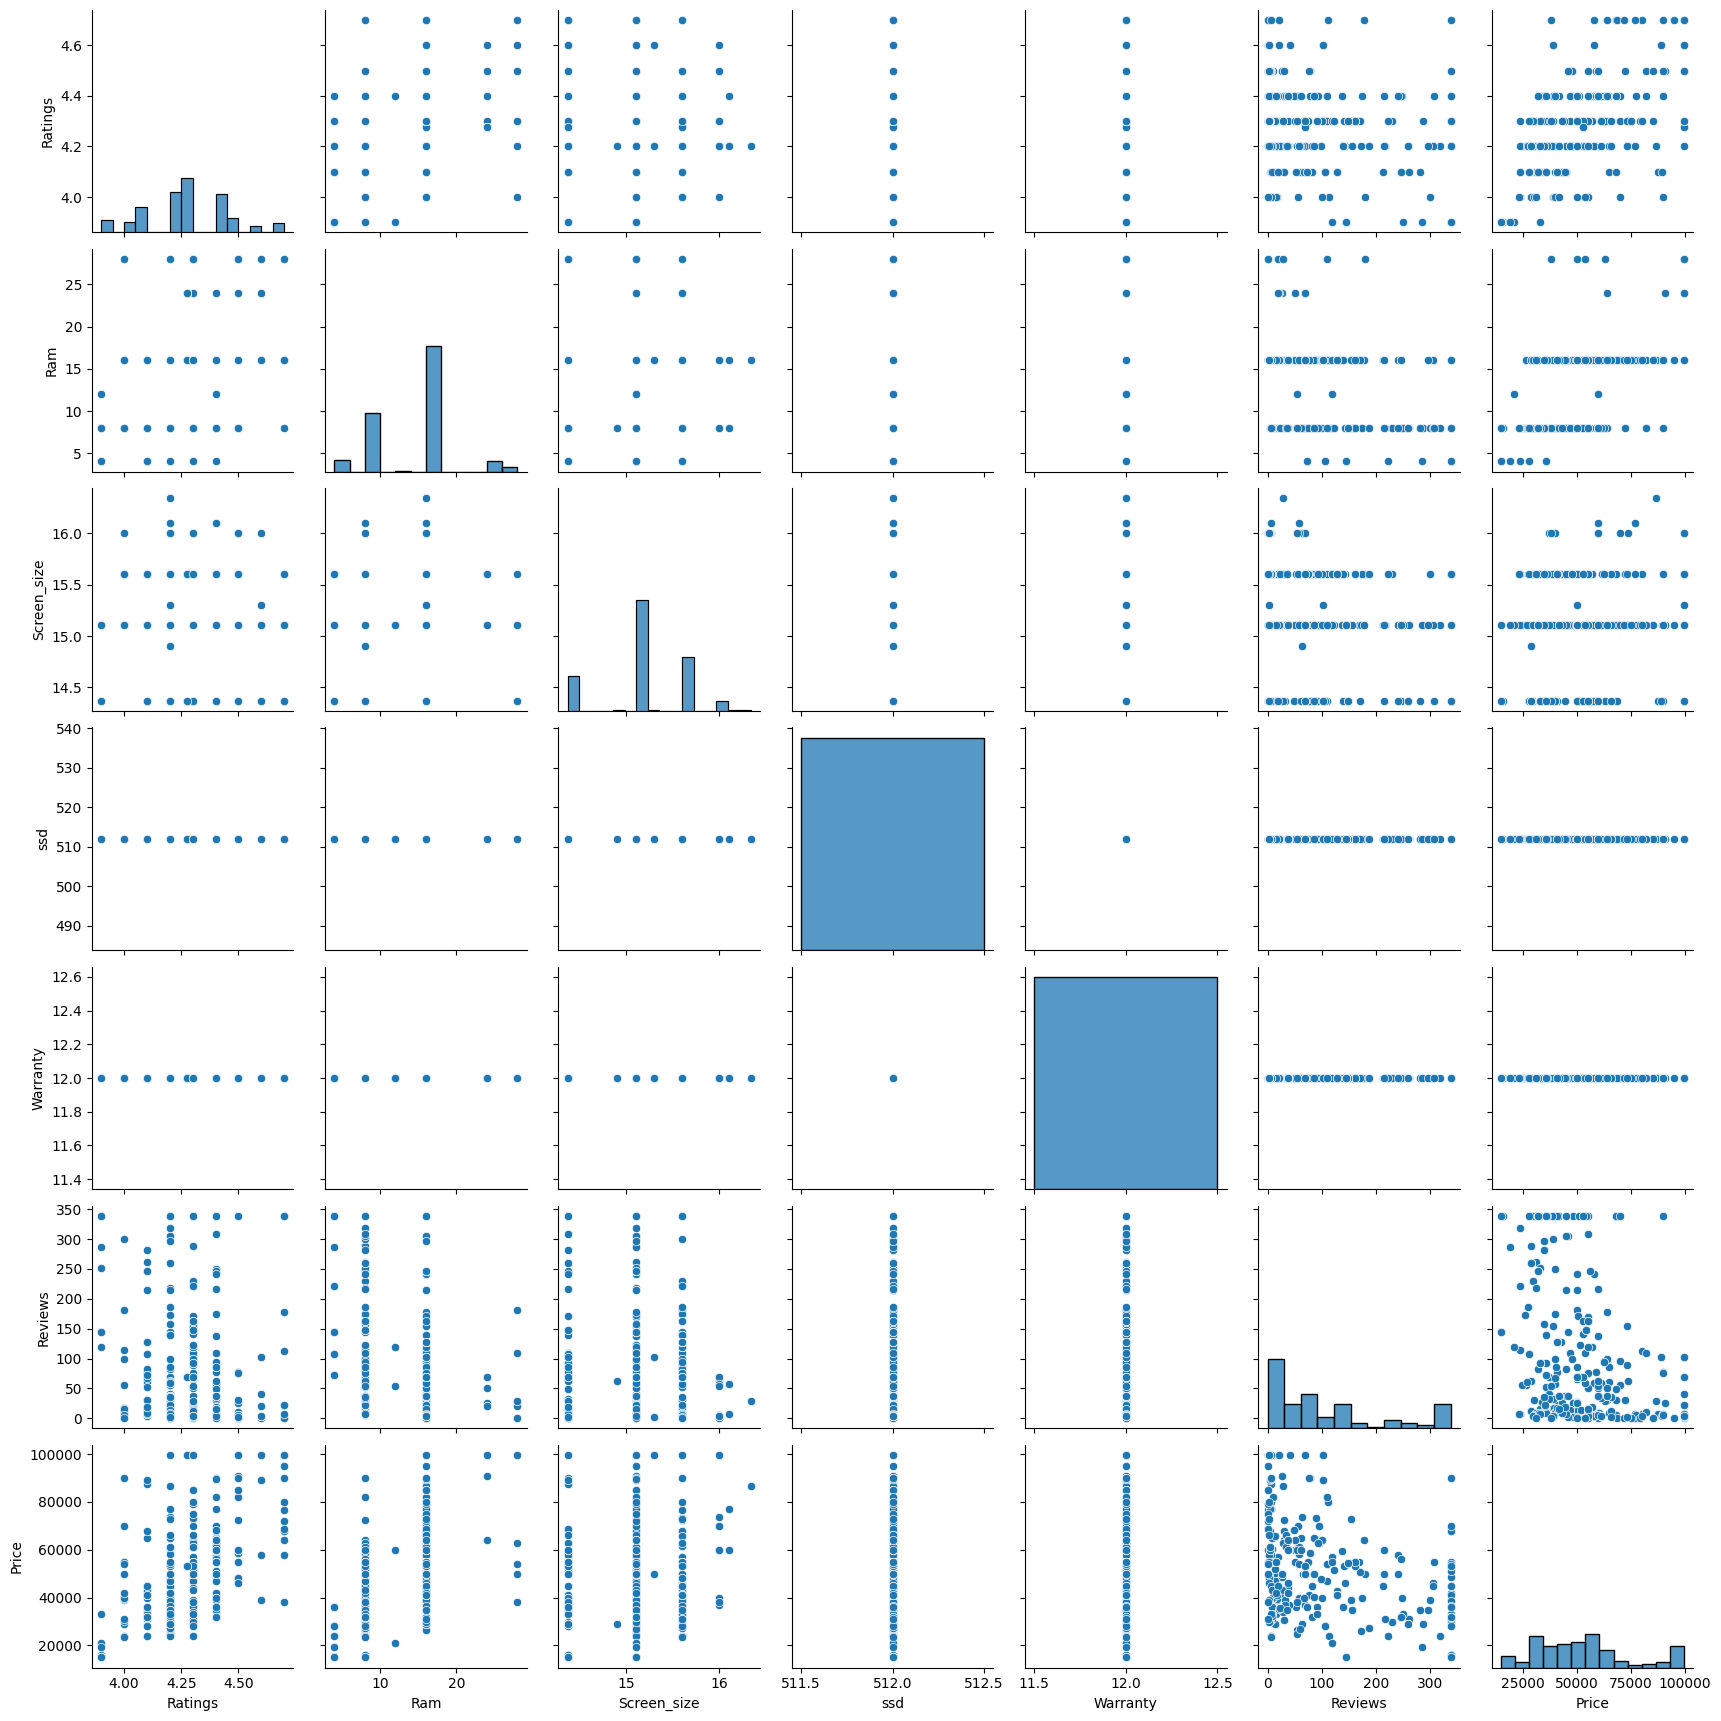

In [58]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include="number").columns  # <-- get column names

# Pairplot for all numeric columns
sns.pairplot(df[numeric_cols])
plt.show()

# Conclusion

### `interpretations or insights`:

#### 1)Most laptops in this data are priced between 40,000 and 80,000
#### 2)Most laptops have ratings between 4.2 and 4.6
#### 3)Most laptops come with 8 to 16 gigabytes of ram
#### 4)The laptops with higher Ram tend to have higher prices
#### 5)RAM and Price are positively correlated.
#### 6)Most of the companies are have 13th gen but Motorola company have only 14th gen laptops
#### 7)Based on the corrleation Heatmap ram and price have positive correlation
#### 8)Screen Size and price have weak positive correlation
#### 9)Rating and prices have moderate positive correlation
#### 10)Reviews and price have strong negative correlation
#### 11)General trend of higher priced laptop having slightly higher ratings
#### 12)There is more reviews for lower priced laptops
#### 13)The more ram reviews are given at 8 to 9 gigabytes laptops
#### 14)Particularly around 14 inches amd 15.5 inches that means laptop screen size are mostly available in the market
#### 15)Outliers exist in our data and with very high-end laptops with high prices.
#### 16) Most of the laptops are i5 series

# Analysis of the prices of Washing machine available on Flipkart

In [90]:
url1="https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_1_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_1_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washing+machine%7CWashing+Machines&requestId=90b6f062-9315-44fa-bcbc-be482eed21d6&as-searchtext=w"

In [91]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0 Safari/537.36"
}

In [92]:
response1=requests.get(url1,headers=headers) # get the webpage

In [93]:
response1.status_code # checking the status code

200

In [94]:
webpage1=response1.text 

In [95]:
soup = BeautifulSoup(webpage1,"html.parser") # parse the html

# 1)Extract the Data

In [96]:
# --------------------------------------------
# Initialize empty lists to store extracted data
# --------------------------------------------
washing_machine_list = []   # Stores product names
rating_list = []            # Stores ratings
price_list = []             # Stores prices
speed_list = []             # Stores spin speeds (RPM)
review_list = []            # Stores number of reviews
weight_list = []            # Stores product weights
warranty_list = []          # Stores warranty period
discount_list = []          # Stores discount info

# --------------------------------------------
# Define headers (to mimic a real browser request)
# Helps avoid getting blocked by Flipkart server
# --------------------------------------------
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0 Safari/537.36"
}

# --------------------------------------------
# Loop through multiple Flipkart pages (1 to 19)
# --------------------------------------------
for i in range(1, 20):

    # Generate URL for each page dynamically
    url1 = f"https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_1_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_1_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washing+machine%7CWashing+Machines&requestId=90b6f062-9315-44fa-bcbc-be482eed21d6&page={i}"

    # Send GET request to fetch webpage
    response = requests.get(url1, headers=headers)
    webpage = response.text

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(webpage, "html.parser")

    # Find all product containers (each washing machine listing)
    all_containers1 = soup.find_all("div", class_="tUxRFH")

    # --------------------------------------------
    # Extract details for each product
    # --------------------------------------------
    for container1 in all_containers1:

        # Extract price
        prices = container1.find("div", class_="Nx9bqj _4b5DiR")

        # Extract washing machine name/title
        washing_machine = container1.find("div", class_="KzDlHZ")

        # Extract star ratings
        star = container1.find("div", class_="XQDdHH")

        # Extract discount information
        discount = container1.find('div', class_="UkUFwK")

        # Extract spin speed (e.g., "1400 RPM")
        speed = re.findall(r"(\d+)\s*[Rr][Pp][Mm]\b", container1.text)

        # Extract review count (e.g., "1,040 Reviews")
        reviews = re.findall(r"([\d,]+)\s+Reviews", container1.text)

        # Extract warranty (e.g., "2 Years")
        warranty = re.findall(r"(\d+)\s*(?:[Yy](?:ears?)?|[Yy]rs?|[Yy]r)\b", container1.text)

        # Extract weight (e.g., "6.5 Kg")
        weight = re.findall(r"([0-9]+(?:[.,][0-9]+)?)\s*[Kk]g(?:s)?\b", container1.text)

        # ---------------- Append Data Safely ---------------- #

        # Price
        if prices:
            price_list.append(prices.text)
        else:
            price_list.append(np.nan)

        # Product Name
        if washing_machine:
            washing_machine_list.append(washing_machine.text)
        else:
            washing_machine_list.append(np.nan)

        # Discount
        if discount:
            discount_list.append(discount.text)
        else:
            discount_list.append(np.nan)

        # Rating
        if star:
            rating_list.append(star.text)
        else:
            rating_list.append(np.nan)

        # Reviews (convert "1,040" → 1040)
        if reviews:
            review_count = reviews[0].replace(",", "")
            review_list.append(int(review_count))
        else:
            review_list.append(np.nan)

        # Warranty (take only first number found)
        if warranty:
            warranty_list.append(int(warranty[0]))
        else:
            warranty_list.append(np.nan)

        # Speed (RPM)
        if speed:
            speed_list.append(int(speed[0]))
        else:
            speed_list.append(np.nan)

        # Weight (convert string to float, handle decimal commas)
        if weight:
            weight_list.append(float(weight[0].replace(',', '.')))
        else:
            weight_list.append(np.nan)  # use NaN for missing


# 2)Create a Data Frame

In [97]:
# Create DataFrame
df1 = pd.DataFrame({
    "Washing Machine": washing_machine_list,
    "Price": price_list,
    "Rating": rating_list,
    "Reviews": review_list,
    "Discount": discount_list,
    "Speed (RPM)": speed_list,
    "Weight (Kg)": weight_list,
    "Warranty (Years)": warranty_list})


In [125]:
df1.head()

,Company,Price,Rating,Reviews,Discount,Speed (RPM),Weight (Kg),Warranty (Years)
0,SAMSUNG,38990,4.3,1499.00,21.0,1400,9.0,2.0
1,THOMSON,7899,4.1,2243.00,31.0,1400,7.5,2.0
2,WHIRLPOOL,27990,4.1,113.00,22.0,1200,7.0,2.0
3,LG,17990,4.4,4112.75,34.0,740,7.0,2.0
4,LG,19490,4.4,4112.75,32.0,740,8.0,2.0


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Washing Machine   456 non-null    object 
 1   Price             456 non-null    object 
 2   Rating            441 non-null    object 
 3   Reviews           441 non-null    float64
 4   Discount          443 non-null    object 
 5   Speed (RPM)       456 non-null    int64  
 6   Weight (Kg)       456 non-null    float64
 7   Warranty (Years)  452 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.6+ KB


# 3)Export into .csv format

In [100]:
df1.to_csv("flipkart_washing_machines.csv", index=False)
print("✅ Data saved to flipkart_washing_machines.csv")

✅ Data saved to flipkart_washing_machines.csv


# 4)Read CSV File

In [101]:
df1 = pd.read_csv("flipkart_washing_machines.csv")

# 1. How many features (columns)?
print("Number of features (columns):", df1.shape[1])

# 2. How many observations (rows)?
print("Number of observations (rows):", df1.shape[0])



Number of features (columns): 8
Number of observations (rows): 456


In [102]:
# 3. Data type of each feature
print("\nData Types of Each Column:\n", df1.dtypes)

# 4. Missing values in each feature
print("\nMissing Values in Each Column:\n", df1.isnull().sum())


Data Types of Each Column:
 Washing Machine      object
Price                object
Rating              float64
Reviews             float64
Discount             object
Speed (RPM)           int64
Weight (Kg)         float64
Warranty (Years)    float64
dtype: object

Missing Values in Each Column:
 Washing Machine      0
Price                0
Rating              15
Reviews             15
Discount            13
Speed (RPM)          0
Weight (Kg)          0
Warranty (Years)     4
dtype: int64


# 5)Clean the Data

In [103]:
# ---------------------------------------------------
# Clean "Price" column (convert ₹12,999 → 12999.0)
# ---------------------------------------------------

df1["Price"] = (
    df1["Price"]
    .astype(str)                      # 1. Ensure all values are strings (handles NaN, numbers, etc.)
    .str.replace("₹", "", regex=False) # 2. Remove the "₹" symbol
    .str.replace(",", "", regex=False) # 3. Remove thousand separators like commas
)

# ---------------------------------------------------
# Convert cleaned strings to float values
# If conversion fails (e.g., missing/invalid), replace with NaN
# ---------------------------------------------------
df1["Price"] = pd.to_numeric(df1["Price"], errors="coerce")


In [104]:
df1["Company"] = df1["Washing Machine"].str.split().str[0].str.upper()  # take first word as brand, convert to uppercase


In [105]:
df1["Discount"] = (
    df1["Discount"]
    .astype(str)                # ensure values are strings
    .str.replace("%", "")       # remove % symbol
    .str.replace("off", "")     # remove the word 'off'
    .str.strip()                # remove leading/trailing spaces
)

df1["Discount"] = pd.to_numeric(df1["Discount"], errors="coerce")  # convert cleaned values to numbers


In [106]:
# Drop the 'Washing Machine' column from the DataFrame
df1 = df1.drop(columns=["Washing Machine"])

In [107]:
# Move 'Company' column to be the first column in the DataFrame
df1 = df1[["Company"] + [col for col in df1.columns if col != "Company"]]

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           456 non-null    object 
 1   Price             456 non-null    int64  
 2   Rating            441 non-null    float64
 3   Reviews           441 non-null    float64
 4   Discount          443 non-null    float64
 5   Speed (RPM)       456 non-null    int64  
 6   Weight (Kg)       456 non-null    float64
 7   Warranty (Years)  452 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 28.6+ KB


In [109]:
df1.head()

,Company,Price,Rating,Reviews,Discount,Speed (RPM),Weight (Kg),Warranty (Years)
0,SAMSUNG,39990,4.3,1499.0,21.0,1400,9.0,2.0
1,THOMSON,7899,4.1,2243.0,31.0,1400,7.5,2.0
2,WHIRLPOOL,27990,4.1,113.0,22.0,1200,7.0,2.0
3,LG,17990,4.4,5673.0,34.0,740,7.0,2.0
4,LG,19490,4.4,5673.0,32.0,740,8.0,2.0


In [110]:
df1.isnull().sum()

Company              0
Price                0
Rating              15
Reviews             15
Discount            13
Speed (RPM)          0
Weight (Kg)          0
Warranty (Years)     4
dtype: int64

In [111]:
# Columns with missing values
cols_to_fill = ["Rating", "Reviews", "Discount", "Warranty (Years)"]

# Fill missing values with median
for col in cols_to_fill:
    df1[col] = df1[col].fillna(df1[col].median())

In [112]:
df1.isnull().sum()

Company             0
Price               0
Rating              0
Reviews             0
Discount            0
Speed (RPM)         0
Weight (Kg)         0
Warranty (Years)    0
dtype: int64

In [113]:
# Function to cap outliers using the IQR method
def cap_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Compute Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values at the bounds instead of removing rows
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Identify all numeric columns (float and integer types)
numeric_cols = df1.select_dtypes(include=["float64", "int64"]).columns

# Apply outlier capping to all numeric columns
for col in numeric_cols:
    df1 = cap_outliers_iqr(df1, col)

# Print confirmation with the total number of rows (unchanged)
print("Outliers handled by capping. Row count:", df1.shape)


Outliers handled by capping. Row count: (456, 8)


# 6)EDA (Exploratory Data Analysis)

## `Uni-variate Analysis`

# Categorical Variables

### Company

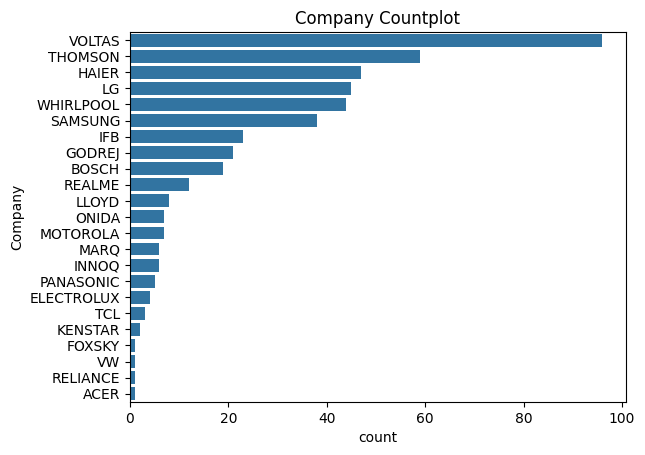

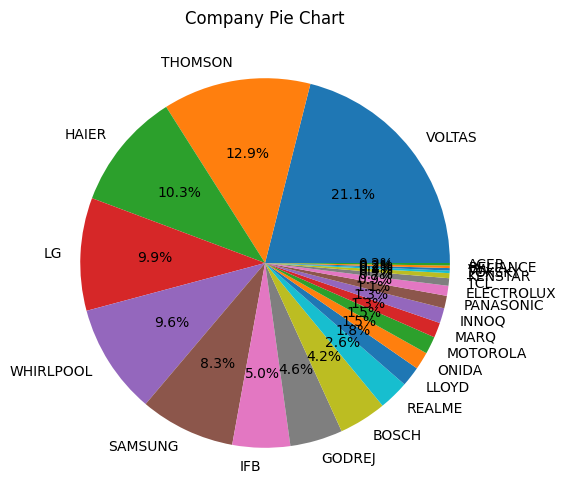

Company
VOLTAS        96
THOMSON       59
HAIER         47
LG            45
WHIRLPOOL     44
SAMSUNG       38
IFB           23
GODREJ        21
BOSCH         19
REALME        12
LLOYD          8
ONIDA          7
MOTOROLA       7
MARQ           6
INNOQ          6
PANASONIC      5
ELECTROLUX     4
TCL            3
KENSTAR        2
FOXSKY         1
VW             1
RELIANCE       1
ACER           1
Name: count, dtype: int64


In [114]:

# Countplot of Companies (sorted by frequency)
sns.countplot(
    y=df1["Company"],                                # y-axis → Company names
    order=df1["Company"].value_counts().index) # sort by most frequent first
plt.title("Company Countplot")
plt.show()

# Pie chart of Companies (proportion view)
df1["Company"].value_counts().plot.pie(
    autopct='%1.1f%%',   # show percentages
    figsize=(6, 6),      # chart size
    title="Company Pie Chart")
plt.ylabel("")  # remove y-axis label for a cleaner chart
plt.show()
# Print frequency count of each Company
print(df1['Company'].value_counts())


# Continuous Variables

### Price

Price Summary:
count      456.000000
mean     16948.076754
std      10072.951241
min       4790.000000
25%       8990.000000
50%      13670.000000
75%      20990.000000
max      38990.000000
Name: Price, dtype: float64


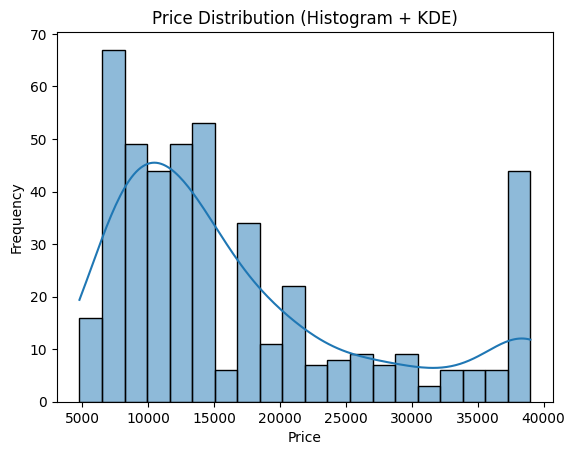

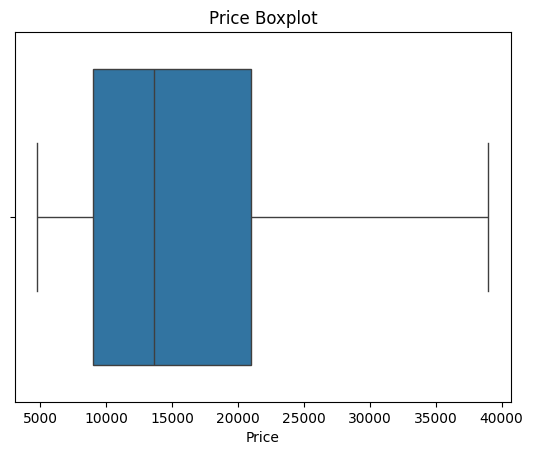

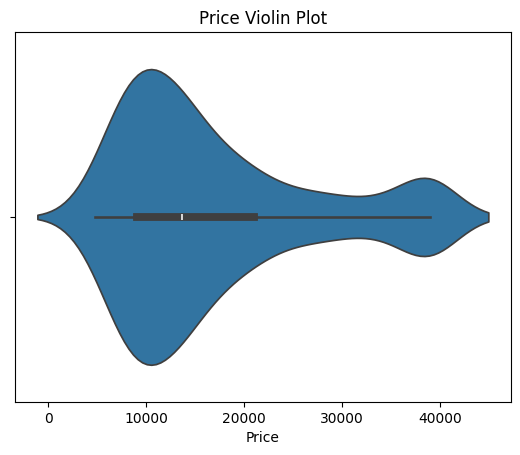

In [115]:
# 🔹 Summary statistics for Price
print("Price Summary:")
print(df1["Price"].describe())   # count, mean, std, min, 25%, 50%, 75%, max

# 🔹 Histogram with KDE (distribution curve)
sns.histplot(df1["Price"], kde=True, bins=20)
plt.title("Price Distribution (Histogram + KDE)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 🔹 Boxplot (good for detecting outliers)
sns.boxplot(x=df1["Price"])
plt.title("Price Boxplot")
plt.xlabel("Price")
plt.show()

# 🔹 Violin plot (boxplot + density distribution)
sns.violinplot(x=df1["Price"])
plt.title("Price Violin Plot")
plt.xlabel("Price")
plt.show()


### Rating

Rating Summary:
count    456.000000
mean       4.224561
std        0.149761
min        3.800000
25%        4.100000
50%        4.300000
75%        4.300000
max        4.600000
Name: Rating, dtype: float64


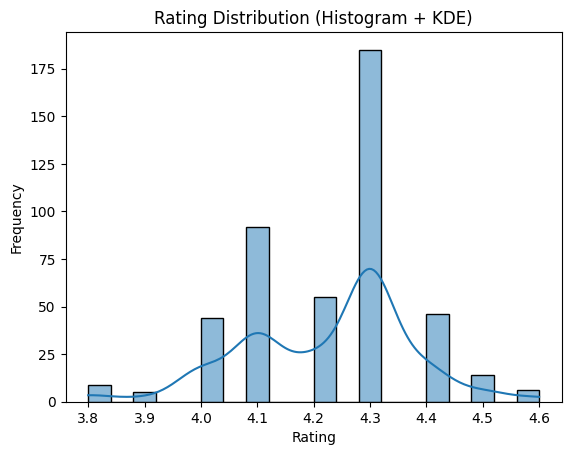

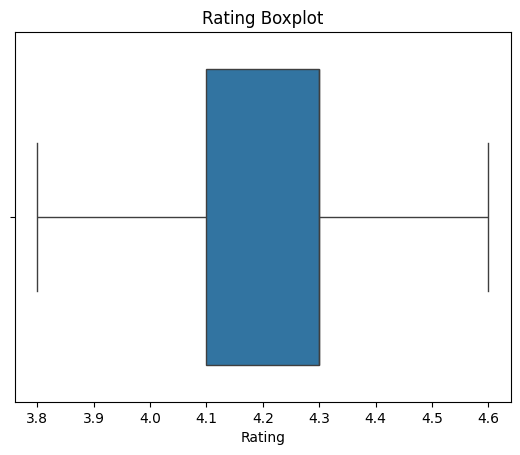

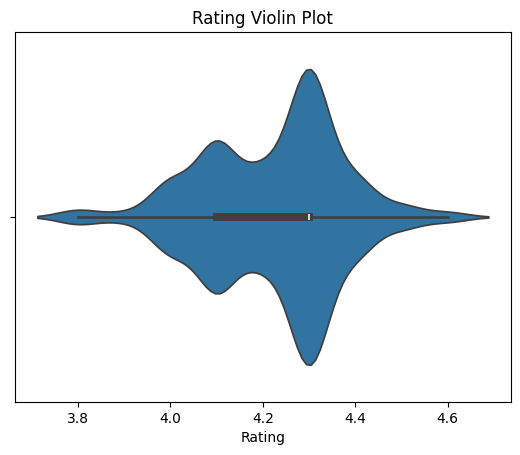

In [116]:
# 🔹 Summary statistics for Rating
print("Rating Summary:")
print(df1["Rating"].describe())   # count, mean, std, min, 25%, 50%, 75%, max

# 🔹 Histogram with KDE
sns.histplot(df1["Rating"], kde=True, bins=20)
plt.title("Rating Distribution (Histogram + KDE)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 🔹 Boxplot
sns.boxplot(x=df1["Rating"])
plt.title("Rating Boxplot")
plt.xlabel("Rating")
plt.show()

# 🔹 Violin plot
sns.violinplot(x=df1["Rating"])
plt.title("Rating Violin Plot")
plt.xlabel("Rating")
plt.show()


### Reviews

Reviews Summary:
count     456.000000
mean     1156.700110
std      1181.217493
min         0.000000
25%       119.000000
50%       812.000000
75%      1716.500000
max      4112.750000
Name: Reviews, dtype: float64


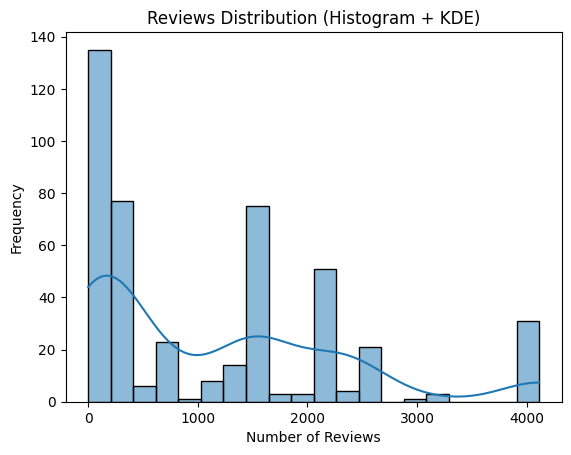

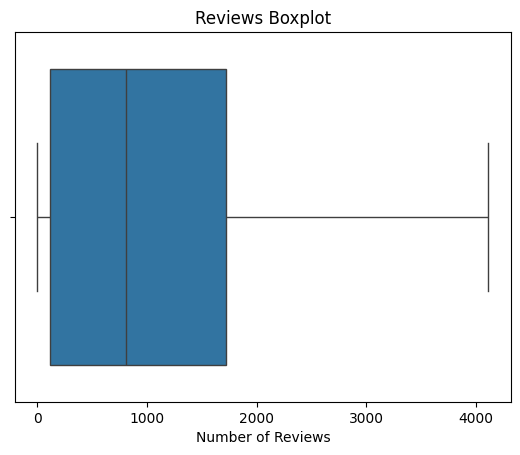

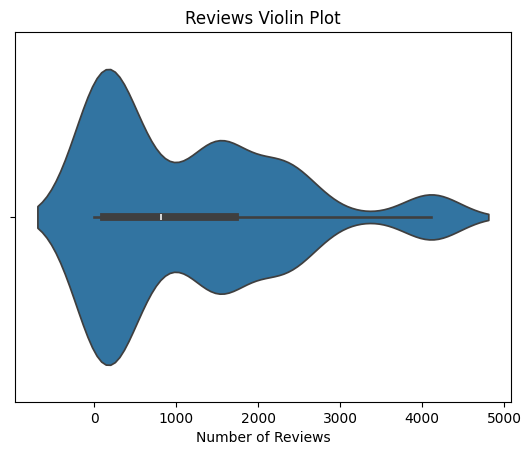

In [117]:
# 🔹 Summary statistics for Reviews
print("Reviews Summary:")
print(df1["Reviews"].describe())   # count, mean, std, min, 25%, 50%, 75%, max

# 🔹 Histogram with KDE
sns.histplot(df1["Reviews"], kde=True, bins=20)
plt.title("Reviews Distribution (Histogram + KDE)")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()

# 🔹 Boxplot
sns.boxplot(x=df1["Reviews"])
plt.title("Reviews Boxplot")
plt.xlabel("Number of Reviews")
plt.show()

# 🔹 Violin plot
sns.violinplot(x=df1["Reviews"])
plt.title("Reviews Violin Plot")
plt.xlabel("Number of Reviews")
plt.show()


### Discount

Discount Summary:
count    456.000000
mean      34.194901
std       10.130858
min        5.625000
25%       27.000000
50%       33.000000
75%       41.250000
max       62.625000
Name: Discount, dtype: float64


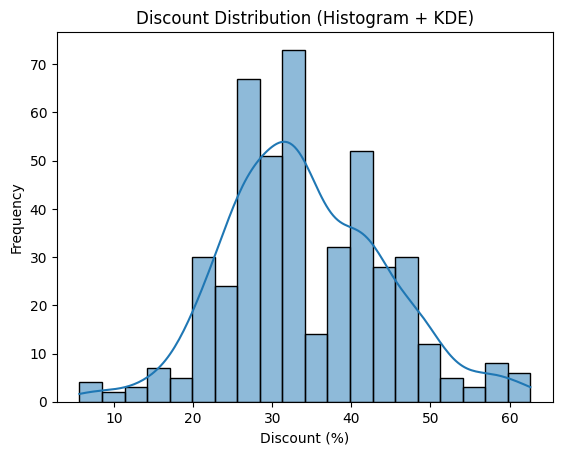

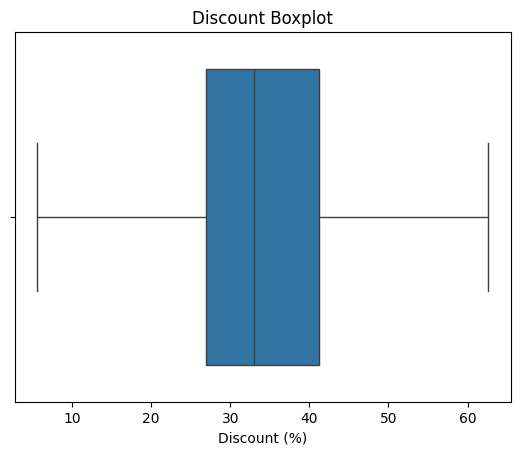

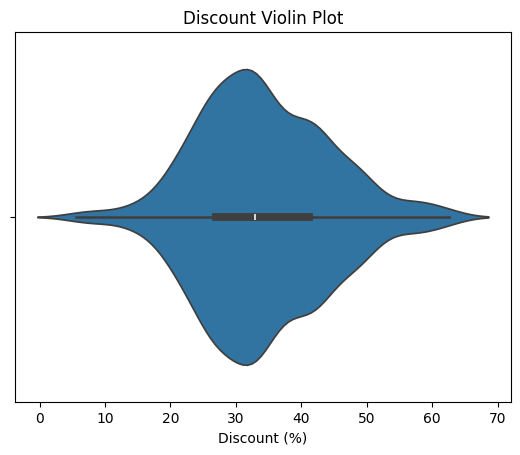

In [118]:
# 🔹 Summary statistics for Discount
print("Discount Summary:")
print(df1["Discount"].describe())   # count, mean, std, min, quartiles, max

# 🔹 Histogram with KDE
sns.histplot(df1["Discount"], kde=True, bins=20)
plt.title("Discount Distribution (Histogram + KDE)")
plt.xlabel("Discount (%)")
plt.ylabel("Frequency")
plt.show()

# 🔹 Boxplot
sns.boxplot(x=df1["Discount"])
plt.title("Discount Boxplot")
plt.xlabel("Discount (%)")
plt.show()

# 🔹 Violin plot
sns.violinplot(x=df1["Discount"])
plt.title("Discount Violin Plot")
plt.xlabel("Discount (%)")
plt.show()


### Speed (RPM)

Speed (RPM) Summary:
count     456.000000
mean     1180.304825
std       280.944055
min         0.000000
25%       840.000000
50%      1300.000000
75%      1400.000000
max      1500.000000
Name: Speed (RPM), dtype: float64


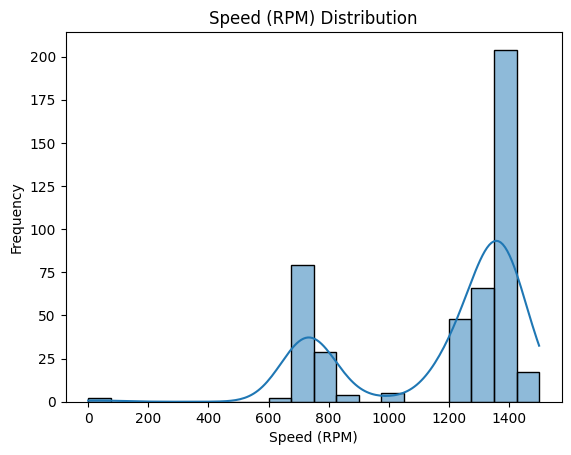

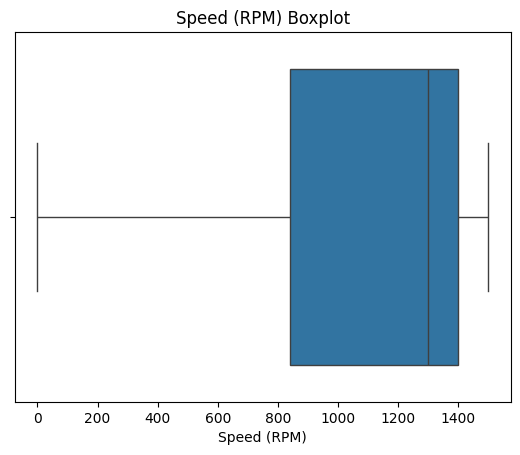

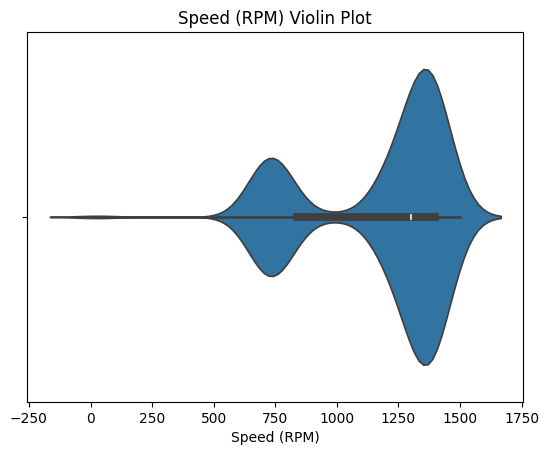

In [119]:
# 🔹 Summary statistics for Speed (RPM)
print("Speed (RPM) Summary:")
print(df1["Speed (RPM)"].describe())   # count, mean, std, min, quartiles, max

# 🔹 Histogram with KDE
sns.histplot(df1["Speed (RPM)"], kde=True, bins=20)
plt.title("Speed (RPM) Distribution")
plt.xlabel("Speed (RPM)")
plt.ylabel("Frequency")
plt.show()

# 🔹 Boxplot
sns.boxplot(x=df1["Speed (RPM)"])
plt.title("Speed (RPM) Boxplot")
plt.xlabel("Speed (RPM)")
plt.show()

# 🔹 Violin plot
sns.violinplot(x=df1["Speed (RPM)"])
plt.title("Speed (RPM) Violin Plot")
plt.xlabel("Speed (RPM)")
plt.show()


### Weight 

Weight (Kg) Summary:
count    456.000000
mean       7.991228
std        1.495388
min        5.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       12.000000
Name: Weight (Kg), dtype: float64


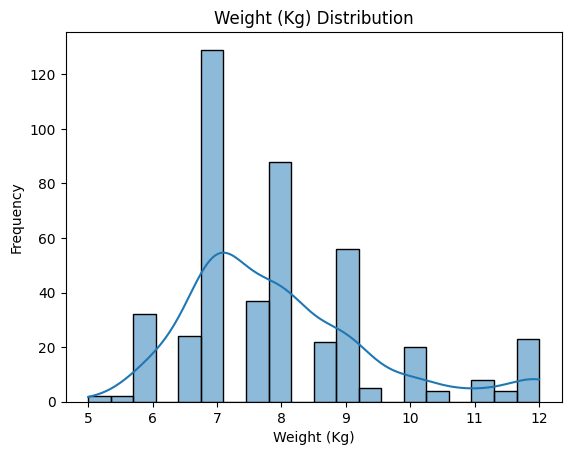

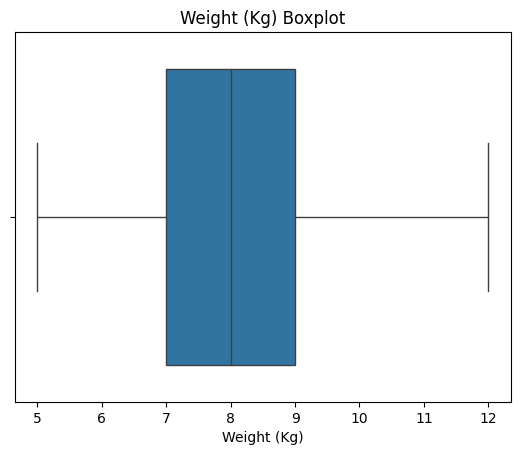

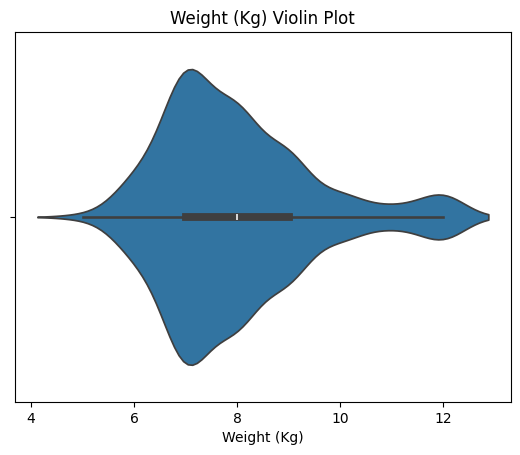

In [120]:
# 🔹 Summary statistics for Weight (Kg)
print("Weight (Kg) Summary:")
print(df1["Weight (Kg)"].describe())   # count, mean, std, min, quartiles, max

# 🔹 Histogram with KDE
sns.histplot(df1["Weight (Kg)"], kde=True, bins=20)
plt.title("Weight (Kg) Distribution")
plt.xlabel("Weight (Kg)")
plt.ylabel("Frequency")
plt.show()

# 🔹 Boxplot
sns.boxplot(x=df1["Weight (Kg)"])
plt.title("Weight (Kg) Boxplot")
plt.xlabel("Weight (Kg)")
plt.show()

# 🔹 Violin plot
sns.violinplot(x=df1["Weight (Kg)"])
plt.title("Weight (Kg) Violin Plot")
plt.xlabel("Weight (Kg)")
plt.show()


### Warranty

Warranty (Years) Summary:
count    456.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: Warranty (Years), dtype: float64


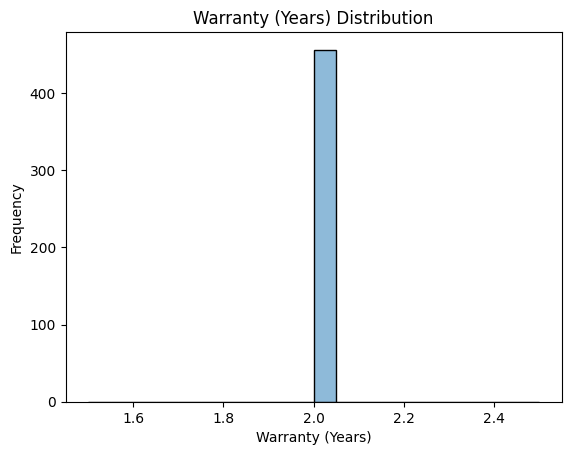

In [121]:
# 🔹 Summary statistics for Warranty (Years)
print("Warranty (Years) Summary:")
print(df1["Warranty (Years)"].describe())   # count, mean, std, min, quartiles, max

# 🔹 Histogram with KDE
sns.histplot(df1["Warranty (Years)"], kde=True, bins=20)
plt.title("Warranty (Years) Distribution")
plt.xlabel("Warranty (Years)")
plt.ylabel("Frequency")
plt.show()


# BiVariate Analysis & Multivariate Analysis:

### Continuous vs Categorical

In [122]:
# 🔹 Group by Company and calculate mean for all numeric features
company_avg = df1.groupby("Company")[["Price", "Rating", "Reviews",
                                      "Warranty (Years)", "Weight (Kg)",
                                      "Speed (RPM)", "Discount"]].mean()

# Display the result
print(company_avg)


                   Price    Rating      Reviews  Warranty (Years)  \
Company                                                             
ACER        13947.000000  4.600000     0.000000               2.0   
BOSCH       25062.421053  4.189474   265.684211               2.0   
ELECTROLUX  36487.500000  4.250000     7.000000               2.0   
FOXSKY       7799.000000  4.000000    57.000000               2.0   
GODREJ      17313.952381  4.200000   186.571429               2.0   
HAIER       13640.851064  4.293617   735.675532               2.0   
IFB         31156.000000  4.204348   899.086957               2.0   
INNOQ        7187.833333  4.200000   317.000000               2.0   
KENSTAR      8290.000000  4.200000    37.000000               2.0   
LG          19959.600000  4.411111  1166.855556               2.0   
LLOYD       16640.250000  4.300000   220.750000               2.0   
MARQ         8673.333333  4.250000  3215.333333               2.0   
MOTOROLA    17775.714286  4.200000

In [123]:
# 🔹 Pivot table with multiple aggregation functions
pivot_price = pd.pivot_table(
    df1,
    values=["Price", "Rating", "Reviews", "Warranty (Years)", "Weight (Kg)", "Speed (RPM)", "Discount"],
    index="Company",
    aggfunc=["mean", "median", "min", "max", "var", "std"]
)

# 🔹 Flatten the MultiIndex columns for easier access
pivot_price.columns = ['_'.join(col).strip() for col in pivot_price.columns.values]

# 🔹 Reset index to make Company a regular column
pivot_price = pivot_price.reset_index()

# 🔹 Display the pivot table
print(pivot_price)


       Company  mean_Discount    mean_Price  mean_Rating  mean_Reviews  \
0         ACER      44.000000  13947.000000     4.600000      0.000000   
1        BOSCH      29.894737  25062.421053     4.189474    265.684211   
2   ELECTROLUX      49.750000  36487.500000     4.250000      7.000000   
3       FOXSKY      57.000000   7799.000000     4.000000     57.000000   
4       GODREJ      36.238095  17313.952381     4.200000    186.571429   
5        HAIER      37.106383  13640.851064     4.293617    735.675532   
6          IFB      24.244565  31156.000000     4.204348    899.086957   
7        INNOQ      61.708333   7187.833333     4.200000    317.000000   
8      KENSTAR      47.500000   8290.000000     4.200000     37.000000   
9           LG      29.000000  19959.600000     4.411111   1166.855556   
10       LLOYD      28.625000  16640.250000     4.300000    220.750000   
11        MARQ      42.833333   8673.333333     4.250000   3215.333333   
12    MOTOROLA      44.428571  17775.7

### Continuous vs Continuous

In [89]:
# List of continuous numeric columns
continuous_cols = ["Price", "Rating", "Reviews", "Discount", "Speed (RPM)", "Weight (Kg)", "Warranty (Years)"]

# Compute correlation matrix for these columns
corr_matrix = df1[continuous_cols].corr()

# Display the correlation matrix
print(corr_matrix)


                     Price    Rating   Reviews  Discount  Speed (RPM)  \
Price             1.000000  0.126650 -0.135863 -0.177418     0.121910   
Rating            0.126650  1.000000  0.199686 -0.196817     0.054702   
Reviews          -0.135863  0.199686  1.000000 -0.290949    -0.440269   
Discount         -0.177418 -0.196817 -0.290949  1.000000     0.335553   
Speed (RPM)       0.121910  0.054702 -0.440269  0.335553     1.000000   
Weight (Kg)       0.051172  0.118763 -0.127476  0.227673     0.278145   
Warranty (Years)       NaN       NaN       NaN       NaN          NaN   

                  Weight (Kg)  Warranty (Years)  
Price                0.051172               NaN  
Rating               0.118763               NaN  
Reviews             -0.127476               NaN  
Discount             0.227673               NaN  
Speed (RPM)          0.278145               NaN  
Weight (Kg)          1.000000               NaN  
Warranty (Years)          NaN               NaN  


# visualization

## Continuous vs Continuous

### Price vs Rating

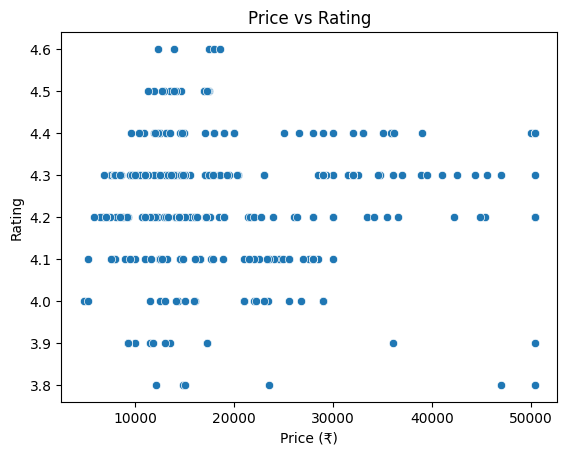

In [90]:
# 🔹 Scatter Plot: Price vs Rating
sns.scatterplot(x="Price", y="Rating", data=df1) 
plt.title("Price vs Rating")                       
plt.xlabel("Price (₹)")                            
plt.ylabel("Rating")                              
plt.show()                                        


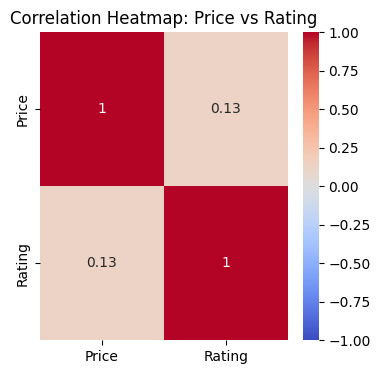

In [91]:
# 🔹 Compute correlation matrix for Price and Rating
corr_matrix = df1[["Price", "Rating"]].corr()  # Pairwise correlation between Price and Ratin

# 🔹 Plot heatmap of the correlation
plt.figure(figsize=(4,4))  # Set figure size
sns.heatmap(
    corr_matrix,           
    annot=True,             
    cmap="coolwarm",       
    vmin=-1, vmax=1        
)
plt.title("Correlation Heatmap: Price vs Rating")  # Add title
plt.show()  # Display the plot


### Price vs Reviews

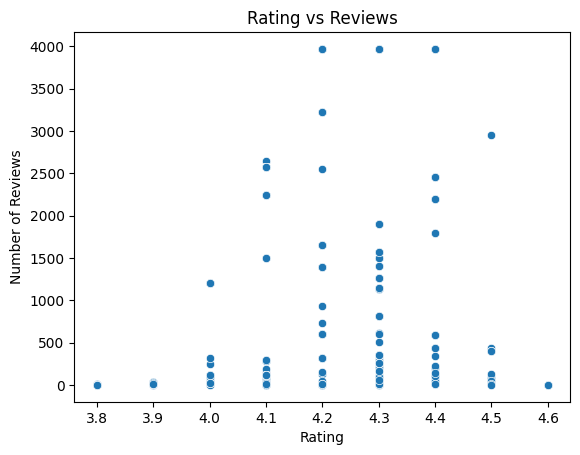

In [92]:
# 🔹 Scatter Plot: Rating vs Reviews
sns.scatterplot(
    x="Rating",      # Rating on X-axis
    y="Reviews",     # Reviews on Y-axis
    data=df1         # Data source
)
plt.title("Rating vs Reviews")  # Add a title
plt.xlabel("Rating")            # Label X-axis
plt.ylabel("Number of Reviews") # Label Y-axis
plt.show()                      # Display the plot


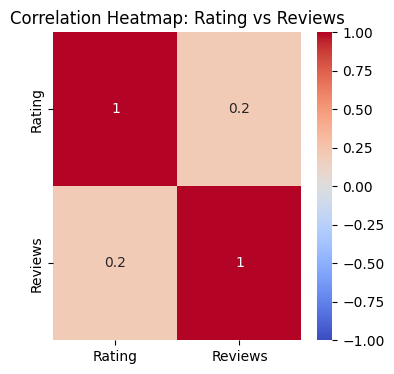

In [93]:
# Compute correlation matrix
corr_matrix = df1[["Rating", "Reviews"]].corr()

# Plot heatmap
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Rating vs Reviews")
plt.show()

## Continuous vs Categorical

### Price vs Company

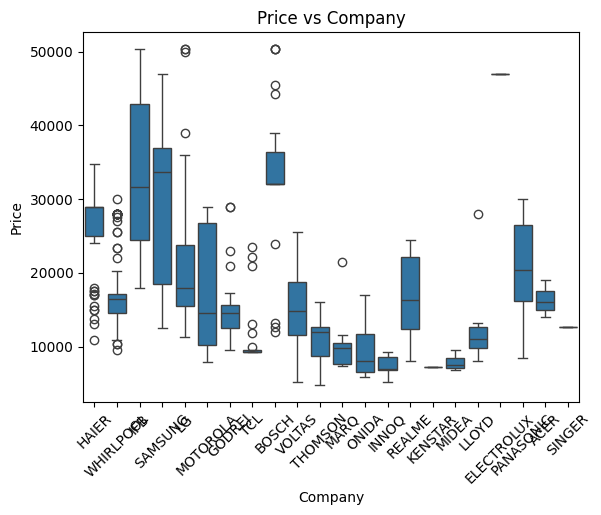

In [94]:
sns.boxplot(x="Company", y="Price", data=df1)  # Boxplot showing the distribution of Price across different Companies
plt.xticks(rotation=45)
plt.title("Price vs Company")
plt.show()


### Rating vs Company

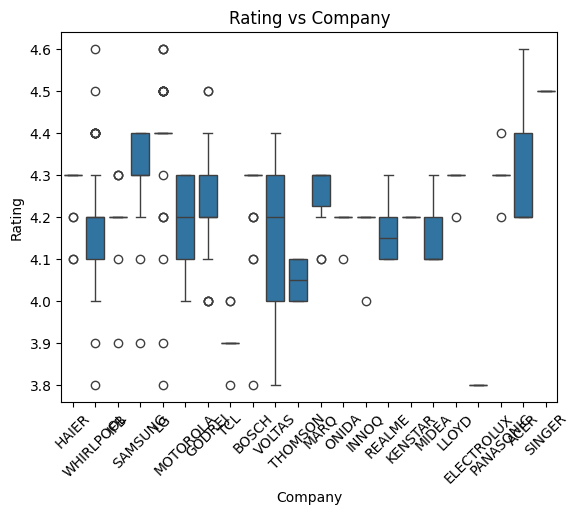

In [96]:
sns.boxplot(x="Company", y="Rating", data=df1)  # Boxplot showing distribution of Ratings for each Company
plt.xticks(rotation=45)
plt.title("Rating vs Company")
plt.show()


### Reviews by Company

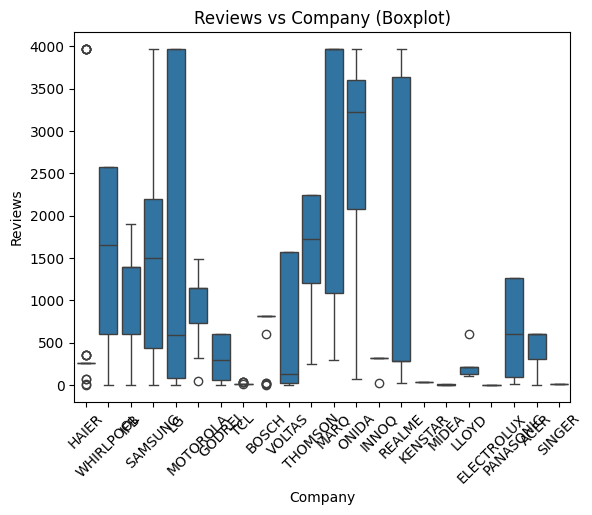

In [98]:
sns.boxplot(x="Company", y="Reviews", data=df1)  # Boxplot showing distribution of Reviews for each Company
plt.xticks(rotation=45)
plt.title("Reviews vs Company (Boxplot)")
plt.show()


### Discount vs Company

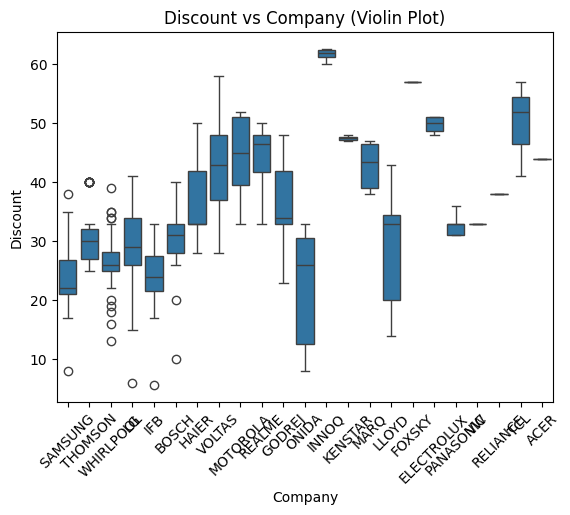

In [128]:
sns.boxplot(x="Company", y="Discount", data=df1)  # Violin plot showing distribution of Discounts for each Company
plt.xticks(rotation=45)
plt.title("Discount vs Company (Violin Plot)")
plt.show()


### Warranty (Years) vs Company

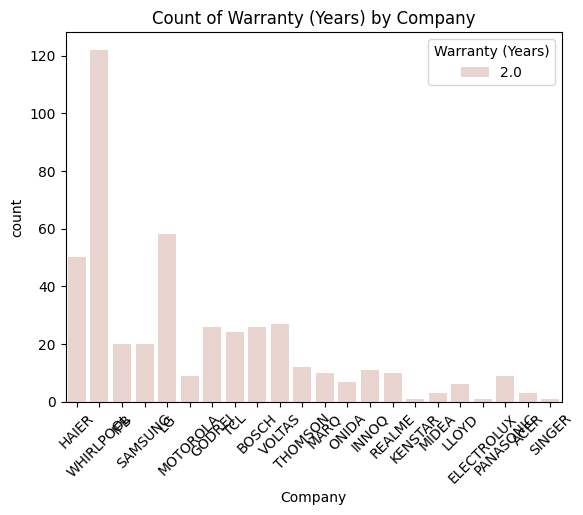

In [100]:
sns.countplot(x="Company", hue="Warranty (Years)", data=df1)  # Count plot showing the number of products with different Warranty (Years) for each Company
plt.xticks(rotation=45)
plt.title("Count of Warranty (Years) by Company")
plt.show()


### Speed (RPM) by Company

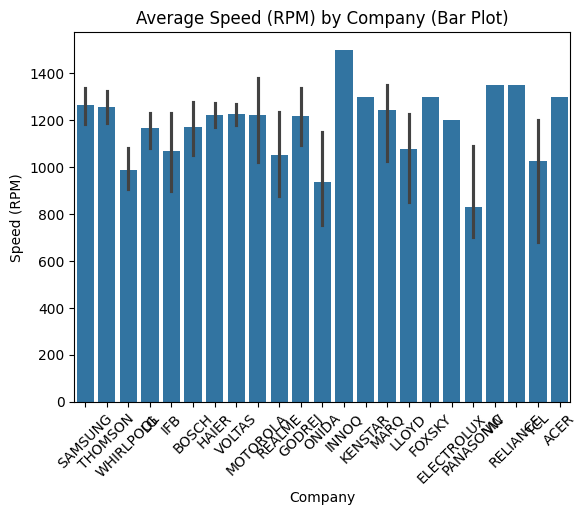

In [139]:
sns.barplot(x="Company", y="Speed (RPM)", data=df1, estimator=lambda x: sum(x)/len(x))  # Bar plot showing average Speed (RPM) for each Company
plt.xticks(rotation=45)
plt.title("Average Speed (RPM) by Company (Bar Plot)")
plt.show()


### Weight vs Company

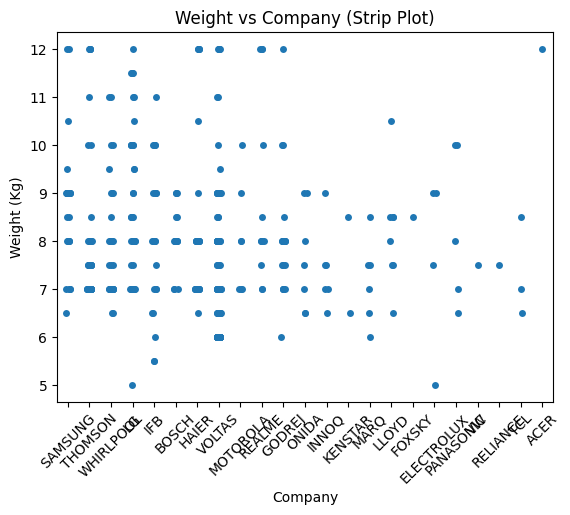

In [140]:
sns.stripplot(x="Company", y="Weight (Kg)", data=df1)  # Strip plot showing distribution of Weight (Kg) for each Company
plt.xticks(rotation=45)
plt.title("Weight vs Company (Strip Plot)")
plt.show()


In [104]:
# Select only numerical columns
num_cols = ["Price","Rating","Reviews","Warranty (Years)","Weight (Kg)","Speed (RPM)","Discount"]

# Correlation matrix
corr_matrix = df1[num_cols].corr()

print("Correlation Coefficients:")
print(corr_matrix)


Correlation Coefficients:
                     Price    Rating   Reviews  Warranty (Years)  Weight (Kg)  \
Price             1.000000  0.126650 -0.135863               NaN     0.051172   
Rating            0.126650  1.000000  0.199686               NaN     0.118763   
Reviews          -0.135863  0.199686  1.000000               NaN    -0.127476   
Warranty (Years)       NaN       NaN       NaN               NaN          NaN   
Weight (Kg)       0.051172  0.118763 -0.127476               NaN     1.000000   
Speed (RPM)       0.121910  0.054702 -0.440269               NaN     0.278145   
Discount         -0.177418 -0.196817 -0.290949               NaN     0.227673   

                  Speed (RPM)  Discount  
Price                0.121910 -0.177418  
Rating               0.054702 -0.196817  
Reviews             -0.440269 -0.290949  
Warranty (Years)          NaN       NaN  
Weight (Kg)          0.278145  0.227673  
Speed (RPM)          1.000000  0.335553  
Discount             0.335553  

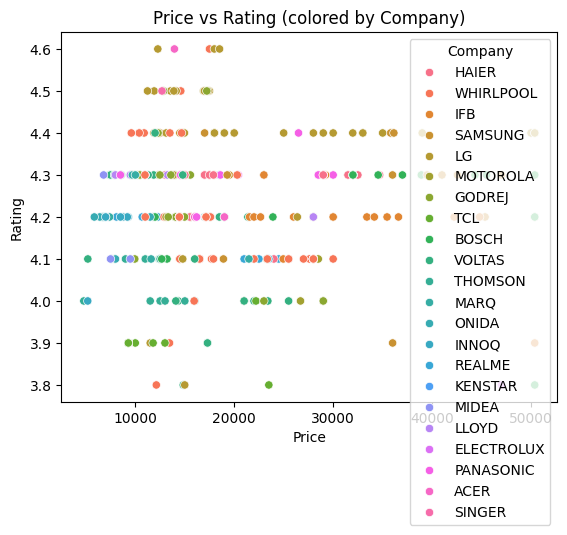

In [105]:
sns.scatterplot(x="Price", y="Rating", hue="Company", data=df1)  # Scatter plot showing relationship between Price and Rating, colored by Company
plt.title("Price vs Rating (colored by Company)")
plt.show()


                     Price    Rating   Reviews  Discount  Speed (RPM)  \
Price             1.000000  0.126650 -0.135863 -0.177418     0.121910   
Rating            0.126650  1.000000  0.199686 -0.196817     0.054702   
Reviews          -0.135863  0.199686  1.000000 -0.290949    -0.440269   
Discount         -0.177418 -0.196817 -0.290949  1.000000     0.335553   
Speed (RPM)       0.121910  0.054702 -0.440269  0.335553     1.000000   
Weight (Kg)       0.051172  0.118763 -0.127476  0.227673     0.278145   
Warranty (Years)       NaN       NaN       NaN       NaN          NaN   

                  Weight (Kg)  Warranty (Years)  
Price                0.051172               NaN  
Rating               0.118763               NaN  
Reviews             -0.127476               NaN  
Discount             0.227673               NaN  
Speed (RPM)          0.278145               NaN  
Weight (Kg)          1.000000               NaN  
Warranty (Years)          NaN               NaN  


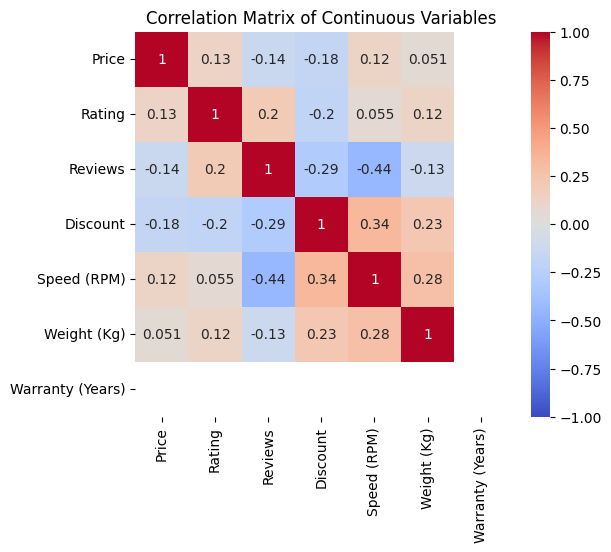

In [106]:
# Select continuous columns
continuous_cols = ["Price", "Rating", "Reviews", "Discount", "Speed (RPM)", "Weight (Kg)", "Warranty (Years)"]

# Compute correlation matrix
corr_matrix = df1[continuous_cols].corr()  # Correlation among continuous variables
print(corr_matrix)

# Heatmap of correlations
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Continuous Variables")
plt.show()


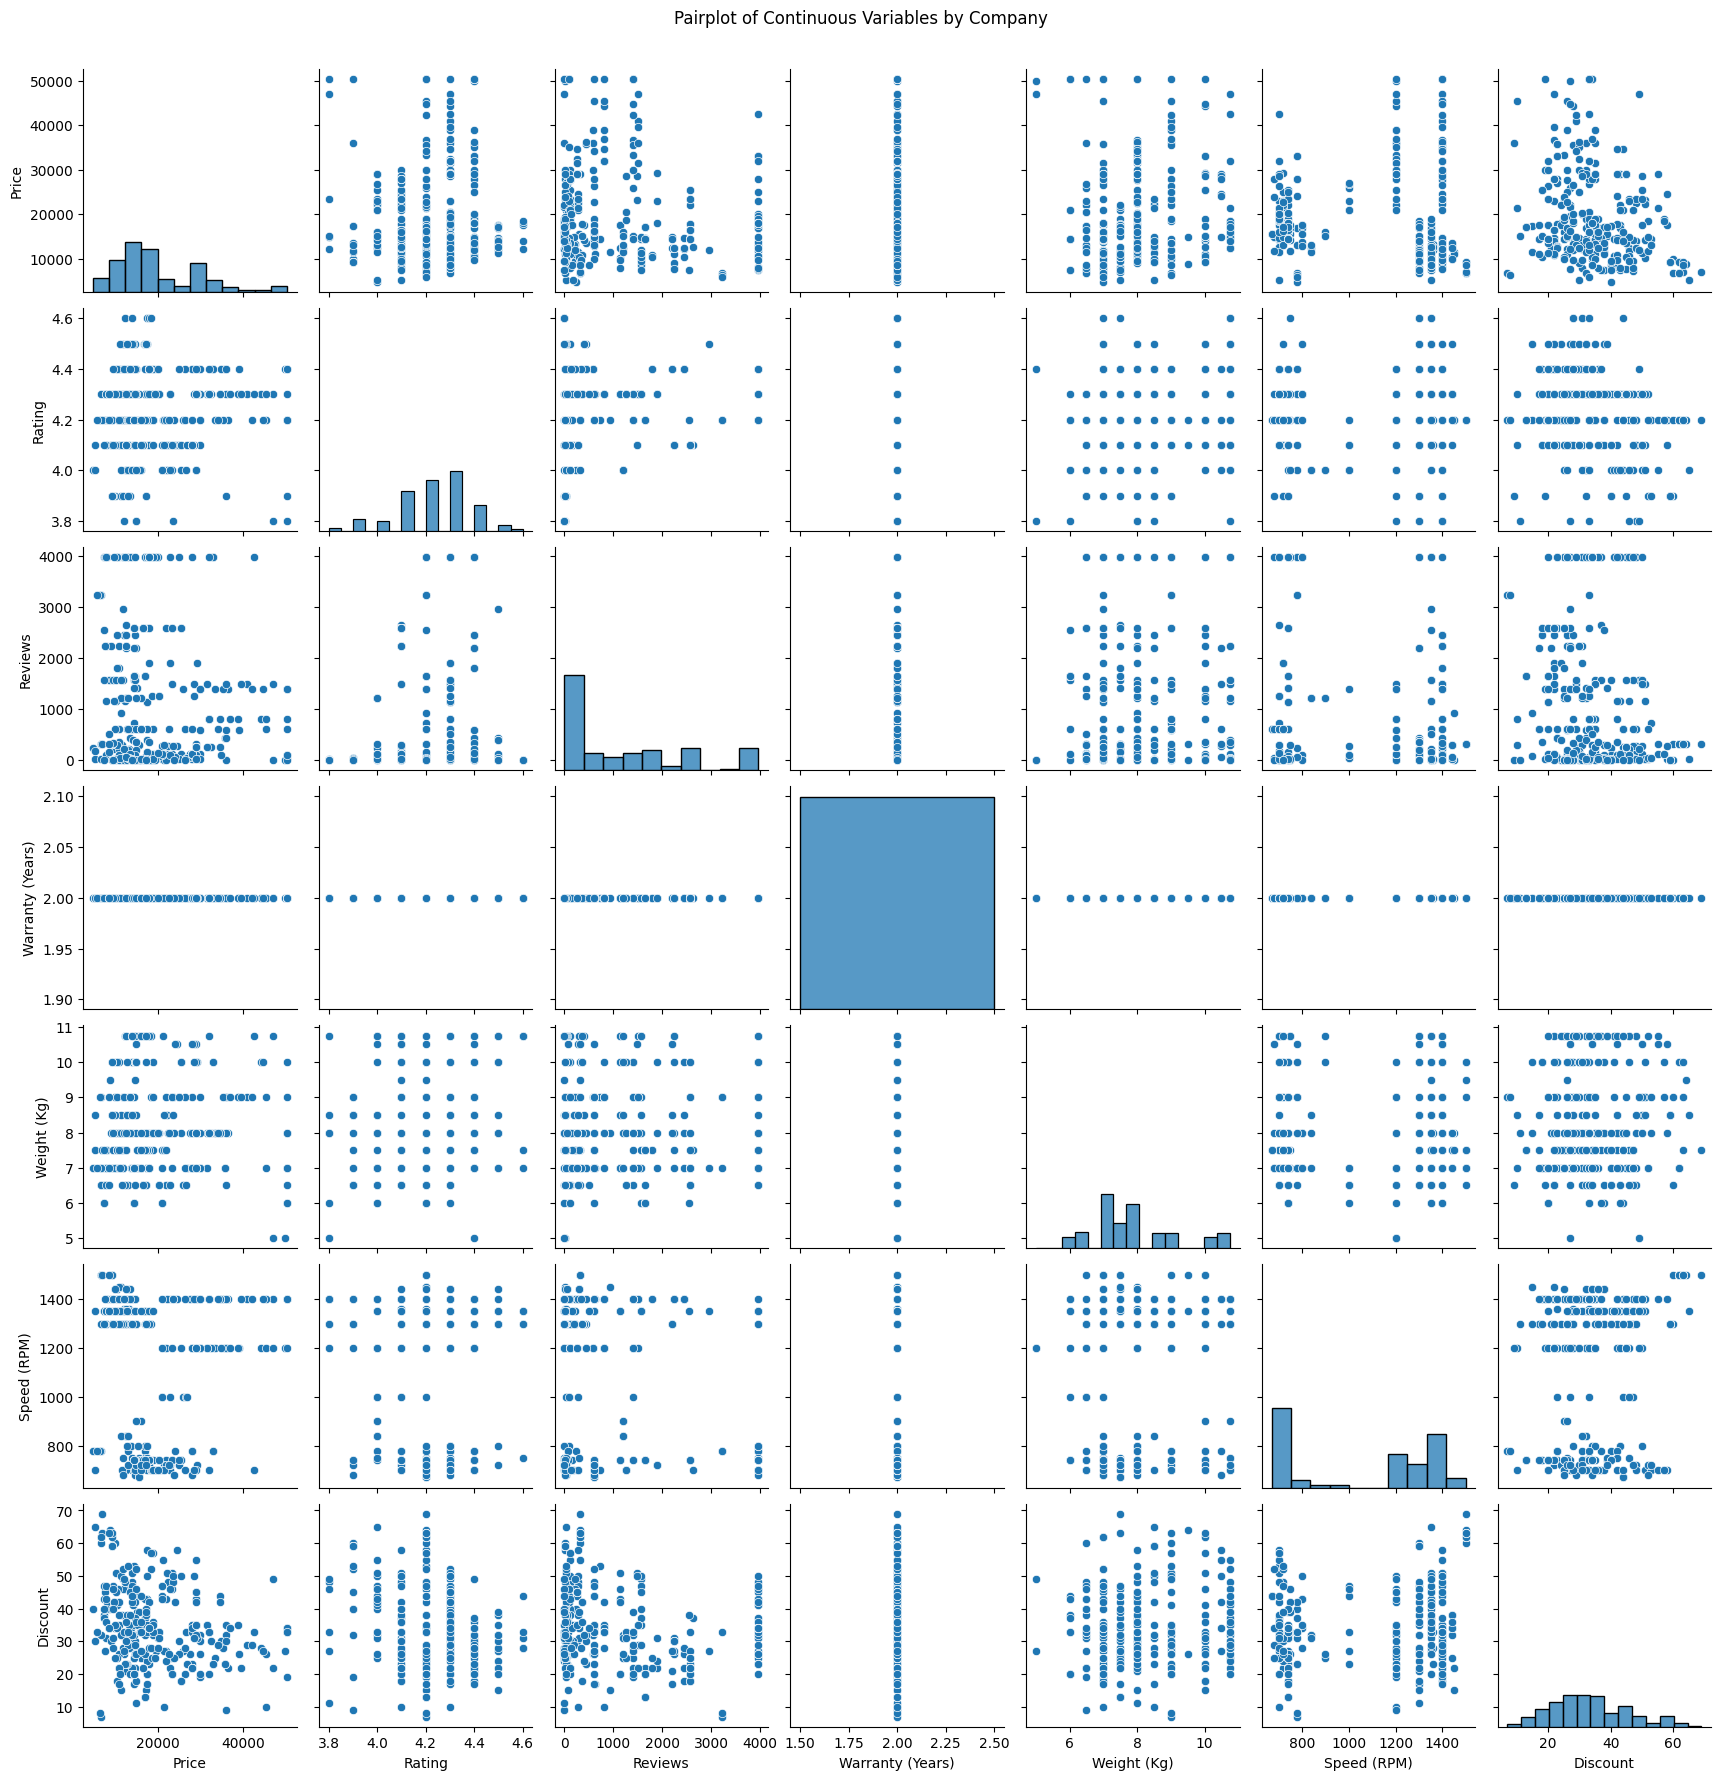

In [107]:
sns.pairplot(df1[["Price","Rating","Reviews","Warranty (Years)","Weight (Kg)","Speed (RPM)","Discount","Company"]])  # Pairplot showing relationships among continuous variables 
plt.suptitle("Pairplot of Continuous Variables by Company", y=1.02)
plt.show()


# Conclusion:

### `interpretations or insights`

#### 1)Washing machines priced between 10,000 and 20,000 rupees are the most common.
#### 2)Most washing machines have a rating between 4.2 and 4.4.
#### 3)Washing machines with around 500 reviews are the most frequent.
#### 4)The majority of washing machines have a speed of around 800 RPM.
#### 5)Most washing machines weigh around 7 kg.
#### 6)The most common warranty period is 2 years.
#### 7)The price and rating of washing machines have a weak positive correlation.
#### 8)There's a moderate positive correlation between the number of reviews and the rating.
#### 9)Discount and price have a weak negative correlation.
#### 10)The "Company Countplot" shows the number of washing machines for each company.
#### 11)The "Price Violin Plot" shows the distribution of prices.
#### 12)The "Rating Violin Plot" shows the distribution of ratings.
#### 13)There is a strong positive correlation between price and rating.This suggests that higher-priced products tends to better rating
#### 14)And also there is a negitive correlation between discount and rating which might mean that products with bigger discounts get lower rating